<a id="2"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Problem Statement</p>

**To uncover the insight of possibility of Autism from the Autism_Child_dataset**

<a id="2"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Importing Libraries</p>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score, make_scorer, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.pipeline import make_pipeline

<a id="2"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Reading Dataset</p>

In [2]:
df = pd.read_csv('Expanded_Autism_Child_Data.csv')
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,age_desc,relation,Class/ASD,Communication_Skills,Repetitive_Behaviors,Sensory_Sensitivity,Coexisting_Conditions,Birth_Complications,Early_Development_Delays,Family_History_ASD
0,1,1,0,0,1,1,0,1,0,0,...,4-11 years,Parent,NO,Good,Moderate,High,ADHD,No,No,Yes
1,1,1,0,0,1,1,0,1,0,0,...,4-11 years,Parent,NO,Fair,Moderate,Very High,NaN,No,Yes,No
2,1,1,0,0,0,1,1,1,0,0,...,4-11 years,?,NO,Developing,Moderate,Low,ADHD,No,Yes,No
3,0,1,0,0,1,1,0,0,0,1,...,4-11 years,?,NO,Good,Moderate,Moderate,Anxiety,No,Yes,No
4,1,1,1,1,1,1,1,1,1,1,...,4-11 years,Parent,YES,Fair,Moderate,Moderate,NaN,No,Yes,No


<a id="2"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Feature Description</p>

Feature | Description
|------|------------
|AX_Score|Score based on the Autism Spectrum Quotient (AQ) 10 item screening tool [AQ-10](https://docs.autismresearchcentre.com/tests/AQ10.pdf)
|Age|Age in years
|Gender| Male or Female
|Ethnicity|Ethnicities in text form
|Jaundice|Whether or not the participant was born with jaundice?
|Autism|Whether or not anyone in tbe immediate family has been diagnosed with autism?
|Country_of_Res|Countries in text format
|Used_app_before|Whether the participant has used a screening app
|Result|Score from the AQ-10 screening tool
|Age_Desc|Age as categorical
|Relation|Relation of person who completed the test
|Class_ASD|Participant classification
|Communication_Skills|Level Of Communication Skill
|Sensory_Sensitivity|Sensitivity to certain conditions(Hot/Cold etc)
|Coexisting_Conditions|Coexisting Conditions ( intellectual disability, anxiety etc)
|Birth_Complications|Complications during birth of Child
|Early_Development_Delays|Physical or Mental Developmental Delays
|Family_History_ASD|Family History of ASD

<a id="4.5"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Shape of DataFrame</p>

In [3]:
df.shape

(30000, 28)

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Understanding the  Dataset</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   A1_Score                  30000 non-null  int64  
 1   A2_Score                  30000 non-null  int64  
 2   A3_Score                  30000 non-null  int64  
 3   A4_Score                  30000 non-null  int64  
 4   A5_Score                  30000 non-null  int64  
 5   A6_Score                  30000 non-null  int64  
 6   A7_Score                  30000 non-null  int64  
 7   A8_Score                  30000 non-null  int64  
 8   A9_Score                  30000 non-null  int64  
 9   A10_Score                 30000 non-null  int64  
 10  age                       29588 non-null  float64
 11  gender                    30000 non-null  object 
 12  ethnicity                 30000 non-null  object 
 13  jundice                   30000 non-null  object 
 14  austim

**INFERENCE:**
    - The dataset has 30000 rows and 28 columns

# <a id="5"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Statistical information of data</p>

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,30000.0,0.633733,0.481792,0.0,0.0,1.0,1.0,1.0
A2_Score,30000.0,0.534567,0.498812,0.0,0.0,1.0,1.0,1.0
A3_Score,30000.0,0.743367,0.436783,0.0,0.0,1.0,1.0,1.0
A4_Score,30000.0,0.551033,0.497397,0.0,0.0,1.0,1.0,1.0
A5_Score,30000.0,0.743233,0.436857,0.0,0.0,1.0,1.0,1.0
A6_Score,30000.0,0.712200,0.452745,0.0,0.0,1.0,1.0,1.0
A7_Score,30000.0,0.606167,0.488607,0.0,0.0,1.0,1.0,1.0
A8_Score,30000.0,0.496500,0.499996,0.0,0.0,0.0,1.0,1.0
A9_Score,30000.0,0.493100,0.499961,0.0,0.0,0.0,1.0,1.0
A10_Score,30000.0,0.726033,0.446000,0.0,0.0,1.0,1.0,1.0


In [6]:
# Summary Statistics for categorical columns
df.describe(include=['object']).T

,count,unique,top,freq
gender,30000,2,m,21373
ethnicity,30000,11,White-European,11100
jundice,30000,2,no,21778
austim,30000,2,no,24976
contry_of_res,30000,52,United Kingdom,5038
used_app_before,30000,2,no,28865
age_desc,30000,1,4-11 years,30000
relation,30000,6,Parent,21972
Class/ASD,30000,2,NO,15511
Communication_Skills,30000,5,Limited,6053


<p style = "font-size:150%; color:#226666">💡 Inference </p>
   
  - <p style = "color:#226666"> The minimum Age is 4 years and the maximum age is 11 years</p>
  - <p style = "color:#226666">The Ethnicity column the highest is White-European </p>
  - <p style = "color:#226666">The Country_Of_Res column the highest is United Kingdom </p>
  - <p style = "color:#226666">The Class_ASD column the highest is 	NO </p>
  - <p style = "color:#226666">The highest number recorded for Gender is for Male</p>
  - <p style = "color:#226666">The highest number recorded for Jaundice is No</p>
  - <p style = "color:#226666">The highest number recorded for Autism is No</p>
  - <p style = "color:#226666">The highest number recorded for Relation is Parent</p>
  - <p style = "color:#226666">The highest number recorded for Communication_Skills is Limited</p>
  - <p style = "color:#226666">The highest number recorded for Repetitive_Behaviors is Very High</p>
  - <p style = "color:#226666">The highest number recorded for Sensory_Sensitivity is High</p>
  - <p style = "color:#226666">The highest number recorded for Coexisting_Conditions is Intellectual Disability</p>
  - <p style = "color:#226666">The highest number recorded for Bith_Complication is No</p>
  - <p style = "color:#226666">The highest number recorded for Early_Development_Delays is Yes</p>
  - <p style = "color:#226666">The highest number recorded for Family_History_ASD is No</p>
  
  
  - <p style = "color:#226666">The column Age_Desc has only 1 unique value which 4-11yrs, hence we can remove this column</p>

# <a id="5"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Finding & Dropping Duplicates</p>

In [7]:
df.duplicated().sum()

565

In [8]:
df=df.drop_duplicates()
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,age_desc,relation,Class/ASD,Communication_Skills,Repetitive_Behaviors,Sensory_Sensitivity,Coexisting_Conditions,Birth_Complications,Early_Development_Delays,Family_History_ASD
0,1,1,0,0,1,1,0,1,0,0,...,4-11 years,Parent,NO,Good,Moderate,High,ADHD,No,No,Yes
1,1,1,0,0,1,1,0,1,0,0,...,4-11 years,Parent,NO,Fair,Moderate,Very High,NaN,No,Yes,No
2,1,1,0,0,0,1,1,1,0,0,...,4-11 years,?,NO,Developing,Moderate,Low,ADHD,No,Yes,No
3,0,1,0,0,1,1,0,0,0,1,...,4-11 years,?,NO,Good,Moderate,Moderate,Anxiety,No,Yes,No
4,1,1,1,1,1,1,1,1,1,1,...,4-11 years,Parent,YES,Fair,Moderate,Moderate,NaN,No,Yes,No


# <a id="5"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Detecting and treating missing (Null) values</p>


In [9]:
df.isnull().sum()

A1_Score                        0
A2_Score                        0
A3_Score                        0
A4_Score                        0
A5_Score                        0
A6_Score                        0
A7_Score                        0
A8_Score                        0
A9_Score                        0
A10_Score                       0
age                           406
gender                          0
ethnicity                       0
jundice                         0
austim                          0
contry_of_res                   0
used_app_before                 0
result                          0
age_desc                        0
relation                        0
Class/ASD                       0
Communication_Skills            0
Repetitive_Behaviors            0
Sensory_Sensitivity             0
Coexisting_Conditions       10905
Birth_Complications             0
Early_Development_Delays        0
Family_History_ASD              0
dtype: int64

<Axes: xlabel='age', ylabel='Density'>

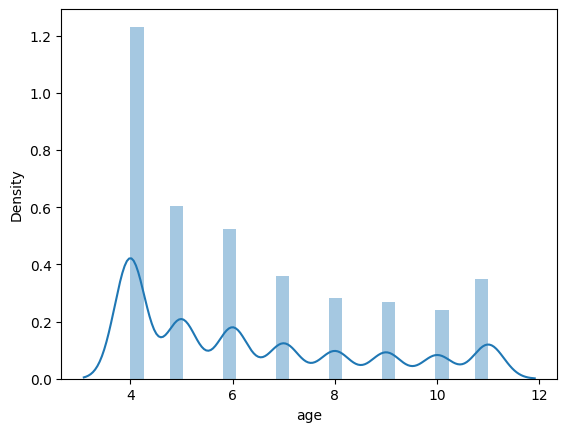

In [10]:
sns.distplot(df['age'])

<Axes: >

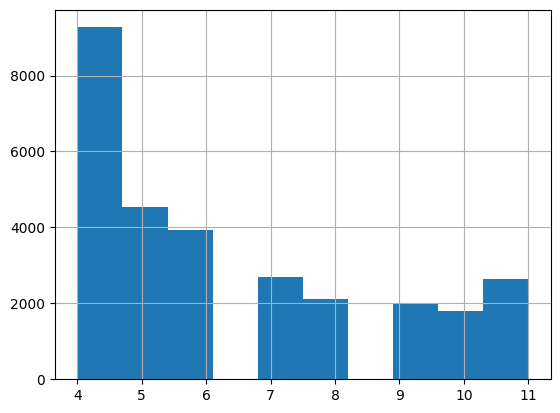

In [11]:
df['age'].hist()

**INFERENCE:**
    - The data is skewed to right(positively skewed)

In [12]:
df['age'].fillna(df['age'].median(),inplace=True)

In [13]:
df['Coexisting_Conditions'].fillna(df['Coexisting_Conditions'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

A1_Score                    0
A2_Score                    0
A3_Score                    0
A4_Score                    0
A5_Score                    0
A6_Score                    0
A7_Score                    0
A8_Score                    0
A9_Score                    0
A10_Score                   0
age                         0
gender                      0
ethnicity                   0
jundice                     0
austim                      0
contry_of_res               0
used_app_before             0
result                      0
age_desc                    0
relation                    0
Class/ASD                   0
Communication_Skills        0
Repetitive_Behaviors        0
Sensory_Sensitivity         0
Coexisting_Conditions       0
Birth_Complications         0
Early_Development_Delays    0
Family_History_ASD          0
dtype: int64

**INFERENCE:**
- We treated Null value by imputing Median to numerical variable as data is positively skewed.Also data is
  not strongly interdepenedent, it is simple to impute and computationally less expensive.
- changing categorical variable  with mode.

# <a id="5"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Dropping Irrelevant Columns</p>


In [15]:
df.drop('age_desc',axis=1,inplace=True)
df.drop('used_app_before',axis=1,inplace=True)

df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result', 'relation',
       'Class/ASD', 'Communication_Skills', 'Repetitive_Behaviors',
       'Sensory_Sensitivity', 'Coexisting_Conditions', 'Birth_Complications',
       'Early_Development_Delays', 'Family_History_ASD'],
      dtype='object')

 **INFERENCE:**
 Droping Columns:
- As age_desc is same for all the data points.
- used_app_before feature doesn't seems to be useful or significant for our problem statement or it will be the source for Data leakage.

# <a id="5"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Renaming Column Names and Replacing Column Values</p>

In [16]:
df = df.rename(columns={'austim': 'Autism','jundice': 'Jaundice'})

df['Coexisting_Conditions']=df['Coexisting_Conditions'].replace({'ADHD, Anxiety':'Anxiety, ADHD','Intellectual Disability, ADHD':'ADHD, Intellectual Disability',
                                                                'Anxiety, Intellectual Disability':'Intellectual Disability, Anxiety'})
df['relation']=df['relation'].replace({'self':'Self'})
df=df.replace({'?':'Others'})

# <a id="5"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Splitting Categorical and Numerical Values</p>

In [17]:
cat_df=df.select_dtypes(include='O')
num_df=df.select_dtypes(exclude='O')
print("numerical colums:",num_df.columns)
print()
print("-----------------------------------------------------------------------------------")
print()
print("categorical columns:",cat_df.columns)

numerical colums: Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result'],
      dtype='object')

-----------------------------------------------------------------------------------

categorical columns: Index(['gender', 'ethnicity', 'Jaundice', 'Autism', 'contry_of_res',
       'relation', 'Class/ASD', 'Communication_Skills', 'Repetitive_Behaviors',
       'Sensory_Sensitivity', 'Coexisting_Conditions', 'Birth_Complications',
       'Early_Development_Delays', 'Family_History_ASD'],
      dtype='object')


In [18]:
for i in cat_df:
    print(i)
    print(df[i].unique())
    print()

gender
['m' 'f']

ethnicity
['Others' 'Middle Eastern ' 'White-European' 'Black' 'South Asian' 'Asian'
 'Pasifika' 'Hispanic' 'Turkish' 'Latino']

Jaundice
['no' 'yes']

Autism
['no' 'yes']

contry_of_res
['Jordan' 'United States' 'Egypt' 'United Kingdom' 'Bahrain' 'Austria'
 'Kuwait' 'United Arab Emirates' 'Europe' 'Malta' 'Bulgaria'
 'South Africa' 'India' 'Afghanistan' 'Georgia' 'New Zealand' 'Syria'
 'Iraq' 'Australia' 'Saudi Arabia' 'Armenia' 'Turkey' 'Pakistan' 'Canada'
 'Oman' 'Brazil' 'South Korea' 'Costa Rica' 'Sweden' 'Philippines'
 'Malaysia' 'Argentina' 'Japan' 'Bangladesh' 'Qatar' 'Ireland' 'Romania'
 'Netherlands' 'Lebanon' 'Germany' 'Latvia' 'Russia' 'Italy' 'China'
 'Nigeria' 'U.S. Outlying Islands' 'Nepal' 'Mexico' 'Isle of Man' 'Libya'
 'Ghana' 'Bhutan']

relation
['Parent' 'Others' 'Self' 'Relative' 'Health care professional']

Class/ASD
['NO' 'YES']

Communication_Skills
['Good' 'Fair' 'Developing' 'Limited' 'Very Limited']

Repetitive_Behaviors
['Moderate' 'High' '

<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Exploratory Data Analaysis(EDA)</p>


<a id="4.5"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Count plot</p>

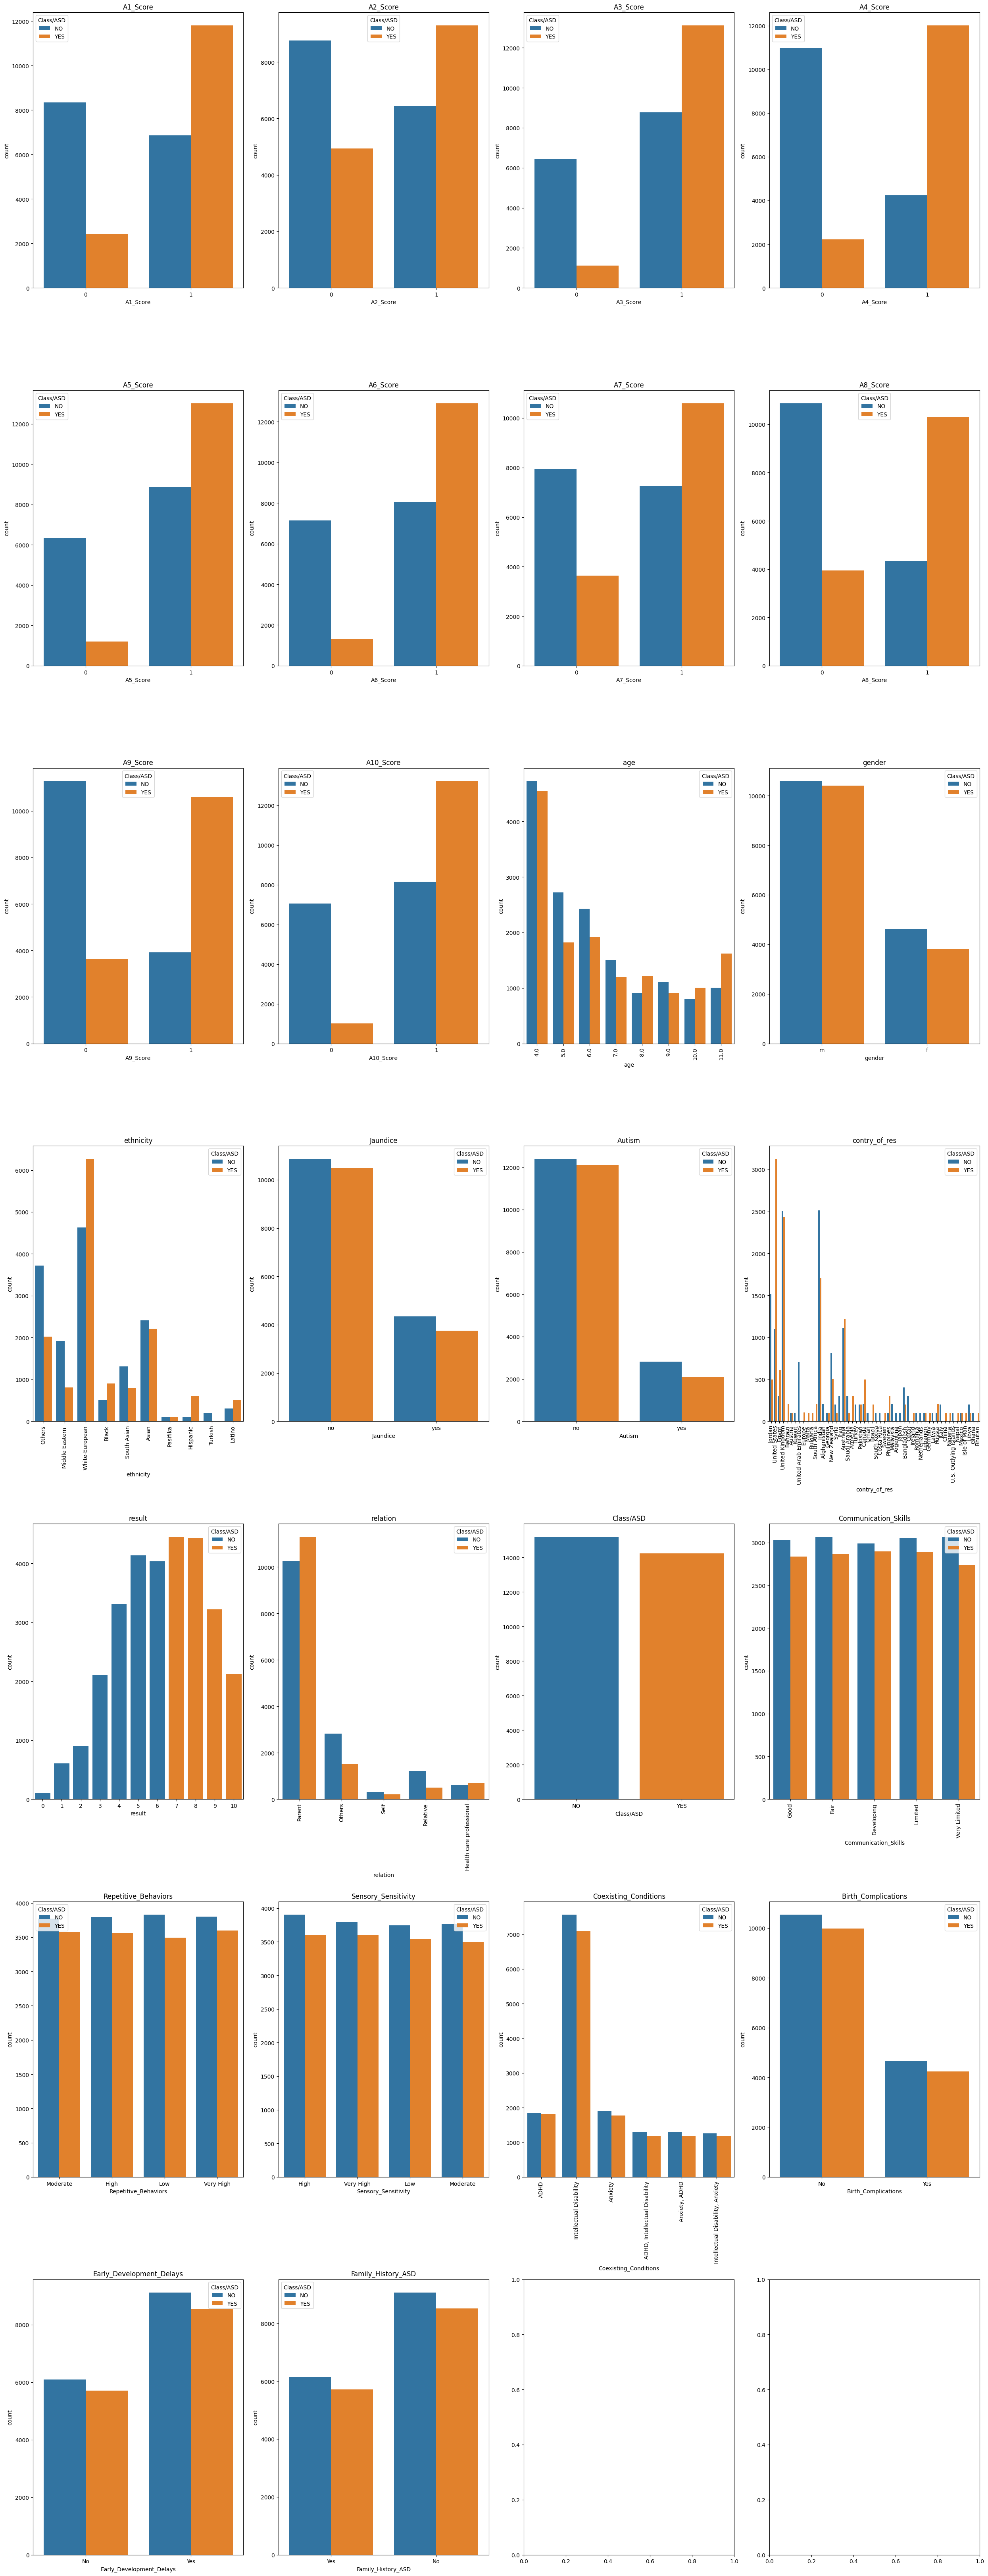

In [19]:
# Countplot for each feature

fig,axes=plt.subplots(7,4,figsize=(25,65)) # Increase the grid size
axes=axes.ravel()
for i , col in enumerate(df.iloc[:,:]):
    sns.countplot(x=df[col],ax=axes[i],hue=df['Class/ASD'])
    axes[i].set_title(col)
    if col == "relation" or col == "ethnicity" or col == "age" or col=="Coexisting_Conditions" or col=="Communication_Skills" or col=="contry_of_res":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

<a id="4.5"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Pie chart for target variable</p>

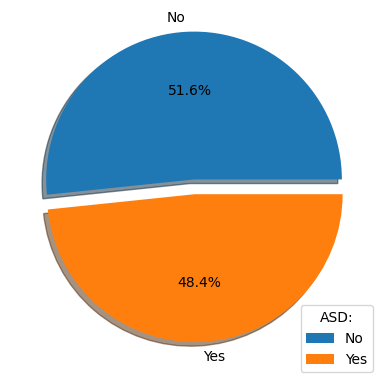

In [20]:
group_sizes = df.groupby('Class/ASD').size()
labels = ['No','Yes']
myexplode = [0.1,0]

# Plot the pie chart
plt.pie(group_sizes, explode=myexplode, shadow=True, autopct='%1.1f%%', labels=labels)
plt.legend(title="ASD:", labels=labels)
plt.show()

An estimation can be made that around 48.4% of Children in the world are affected from Autism Spectrum Disorder

<a id="4.5"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Count plot for Target variable with respect to all feature</p>

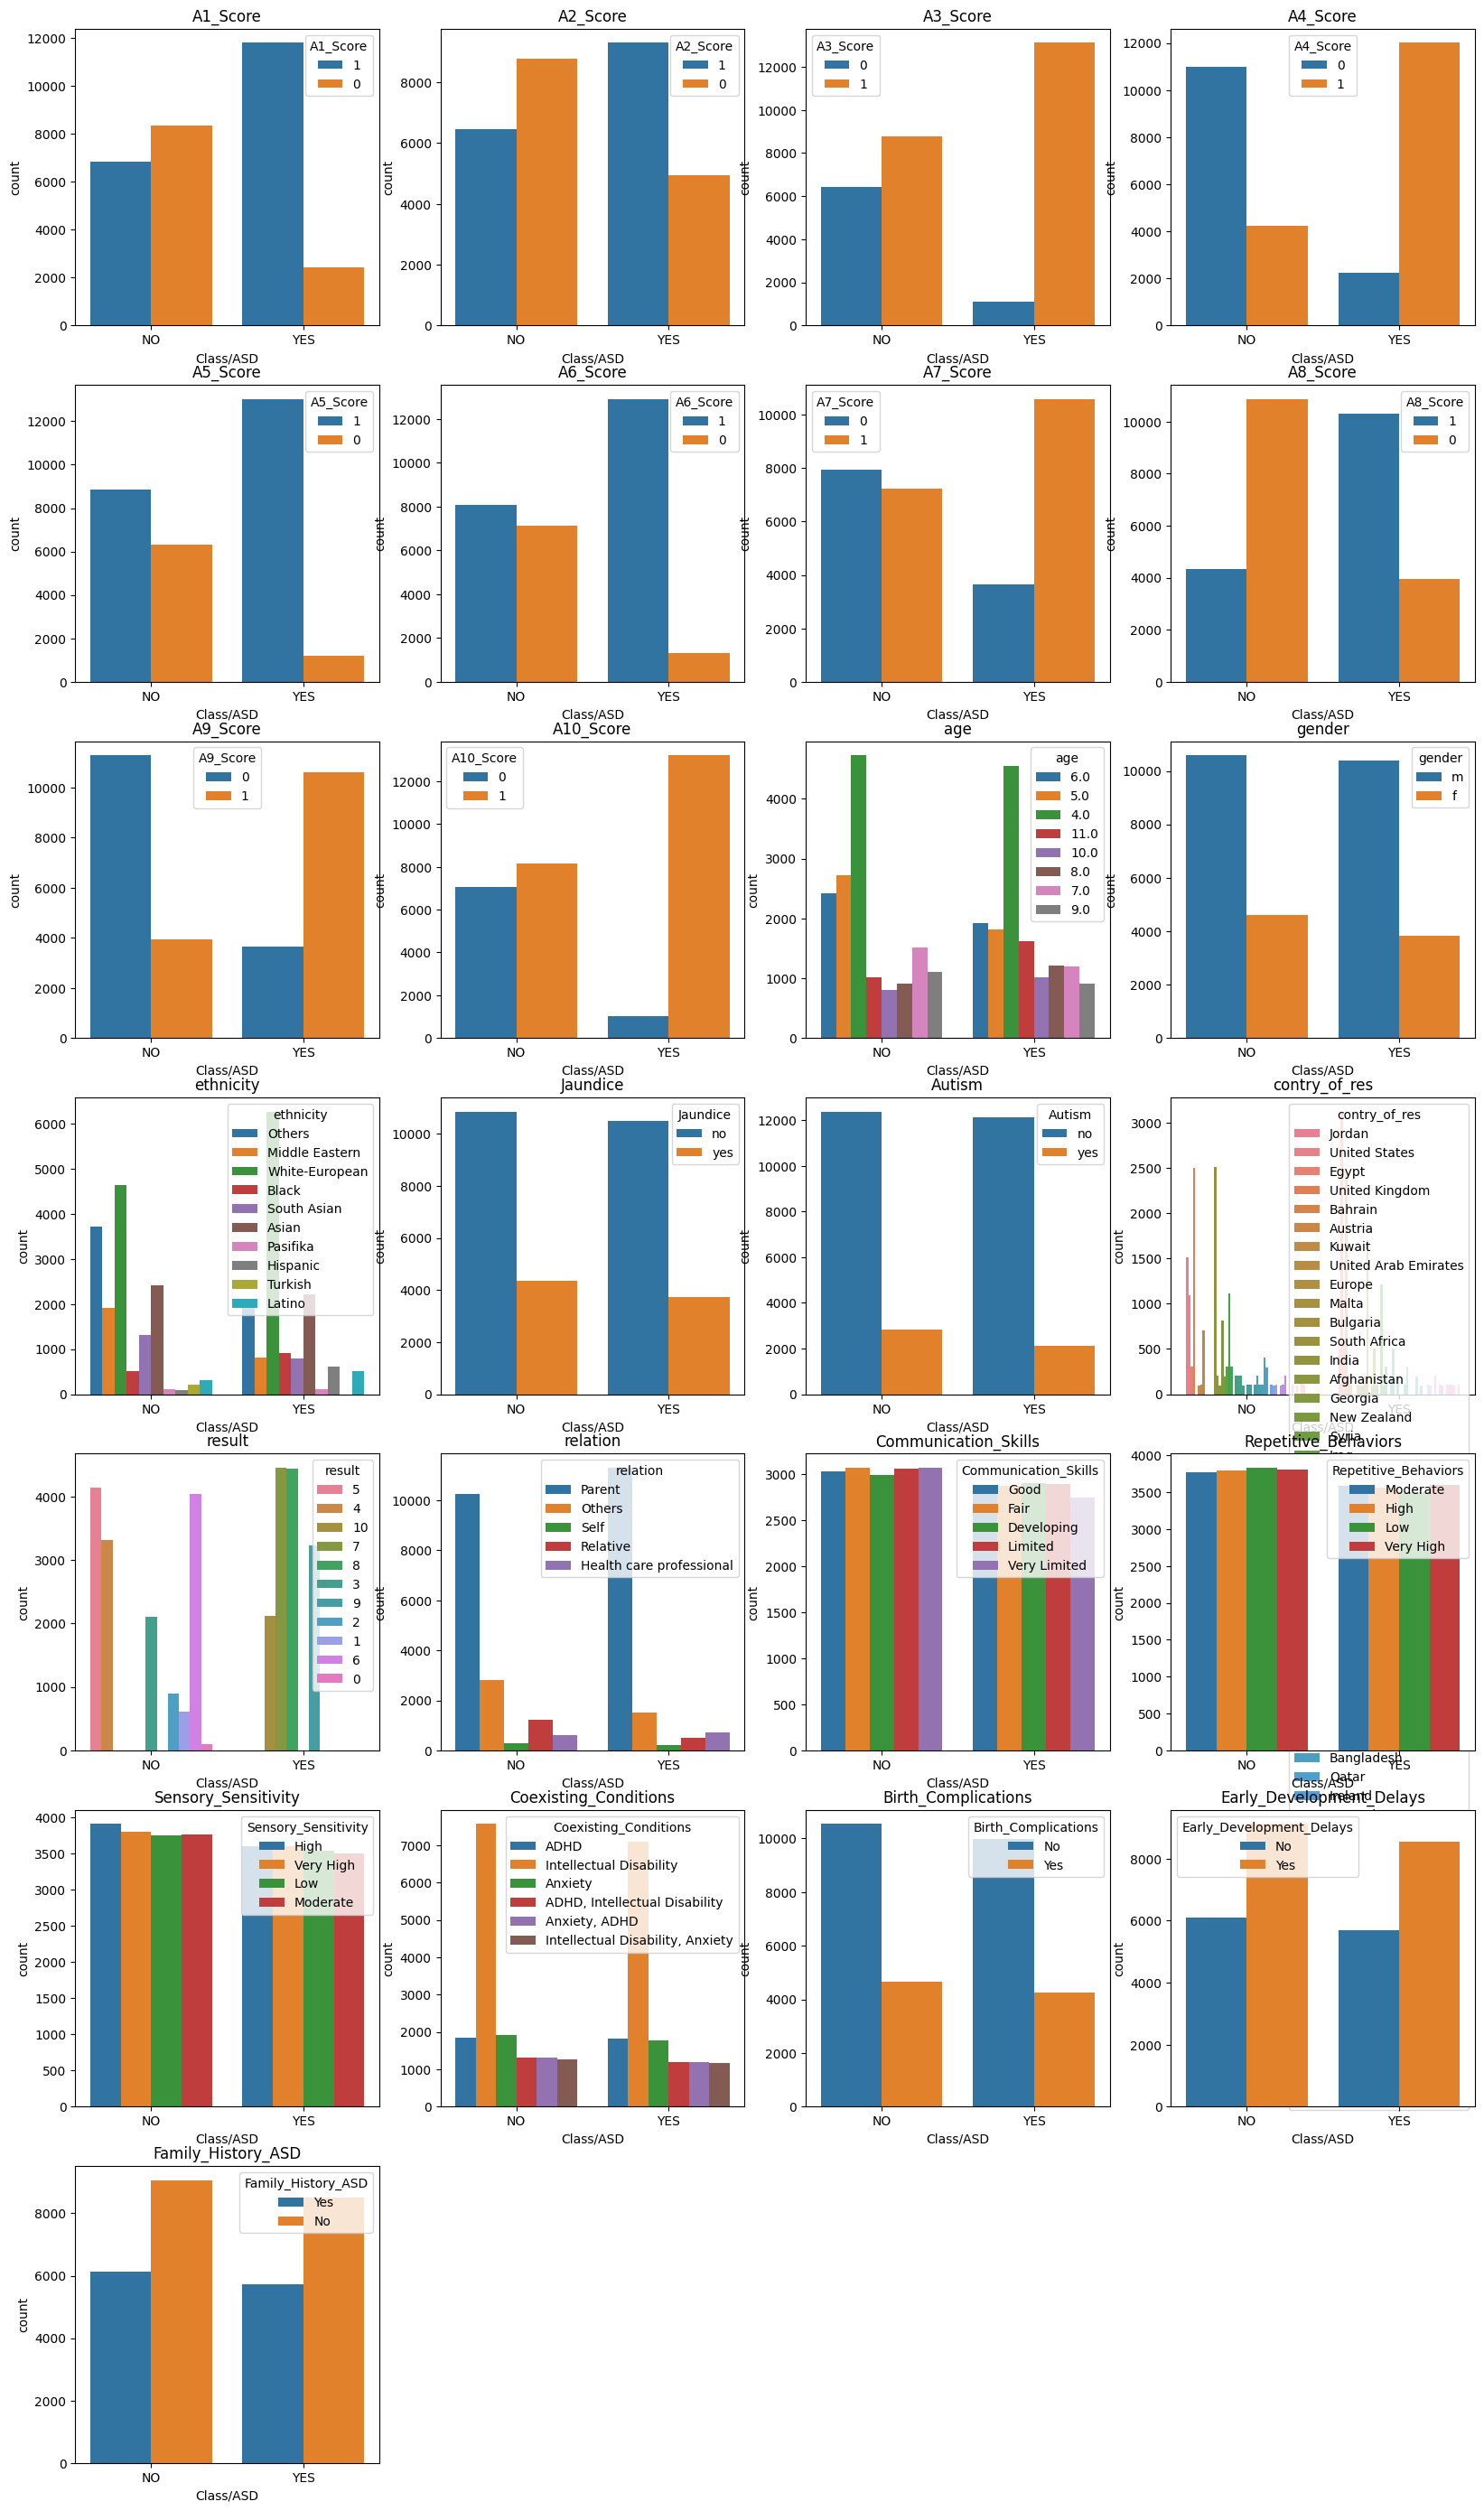

In [21]:
# Plotting all columns with respect to target column 'Class_ASD'
fig, axes = plt.subplots(7, 4, figsize=(20, 35))
axes = axes.ravel()

# Iterate through the columns, excluding the target column
for i, col in enumerate(df.columns.drop('Class/ASD')):
    # Ensure there is variation in the data
    if df[col].nunique() > 1:
        # Pass the DataFrame 'df' to the 'data' parameter
        sns.countplot(x='Class/ASD', hue=df[col].astype('str'), data=df, ax=axes[i])
        axes[i].set_title(col)
    else:
        axes[i].text(0.5, 0.5, 'No variation', horizontalalignment='center', verticalalignment='center')
        axes[i].set_title(col)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<a id="4.5"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Count plot for all features with respect to target variable</p>

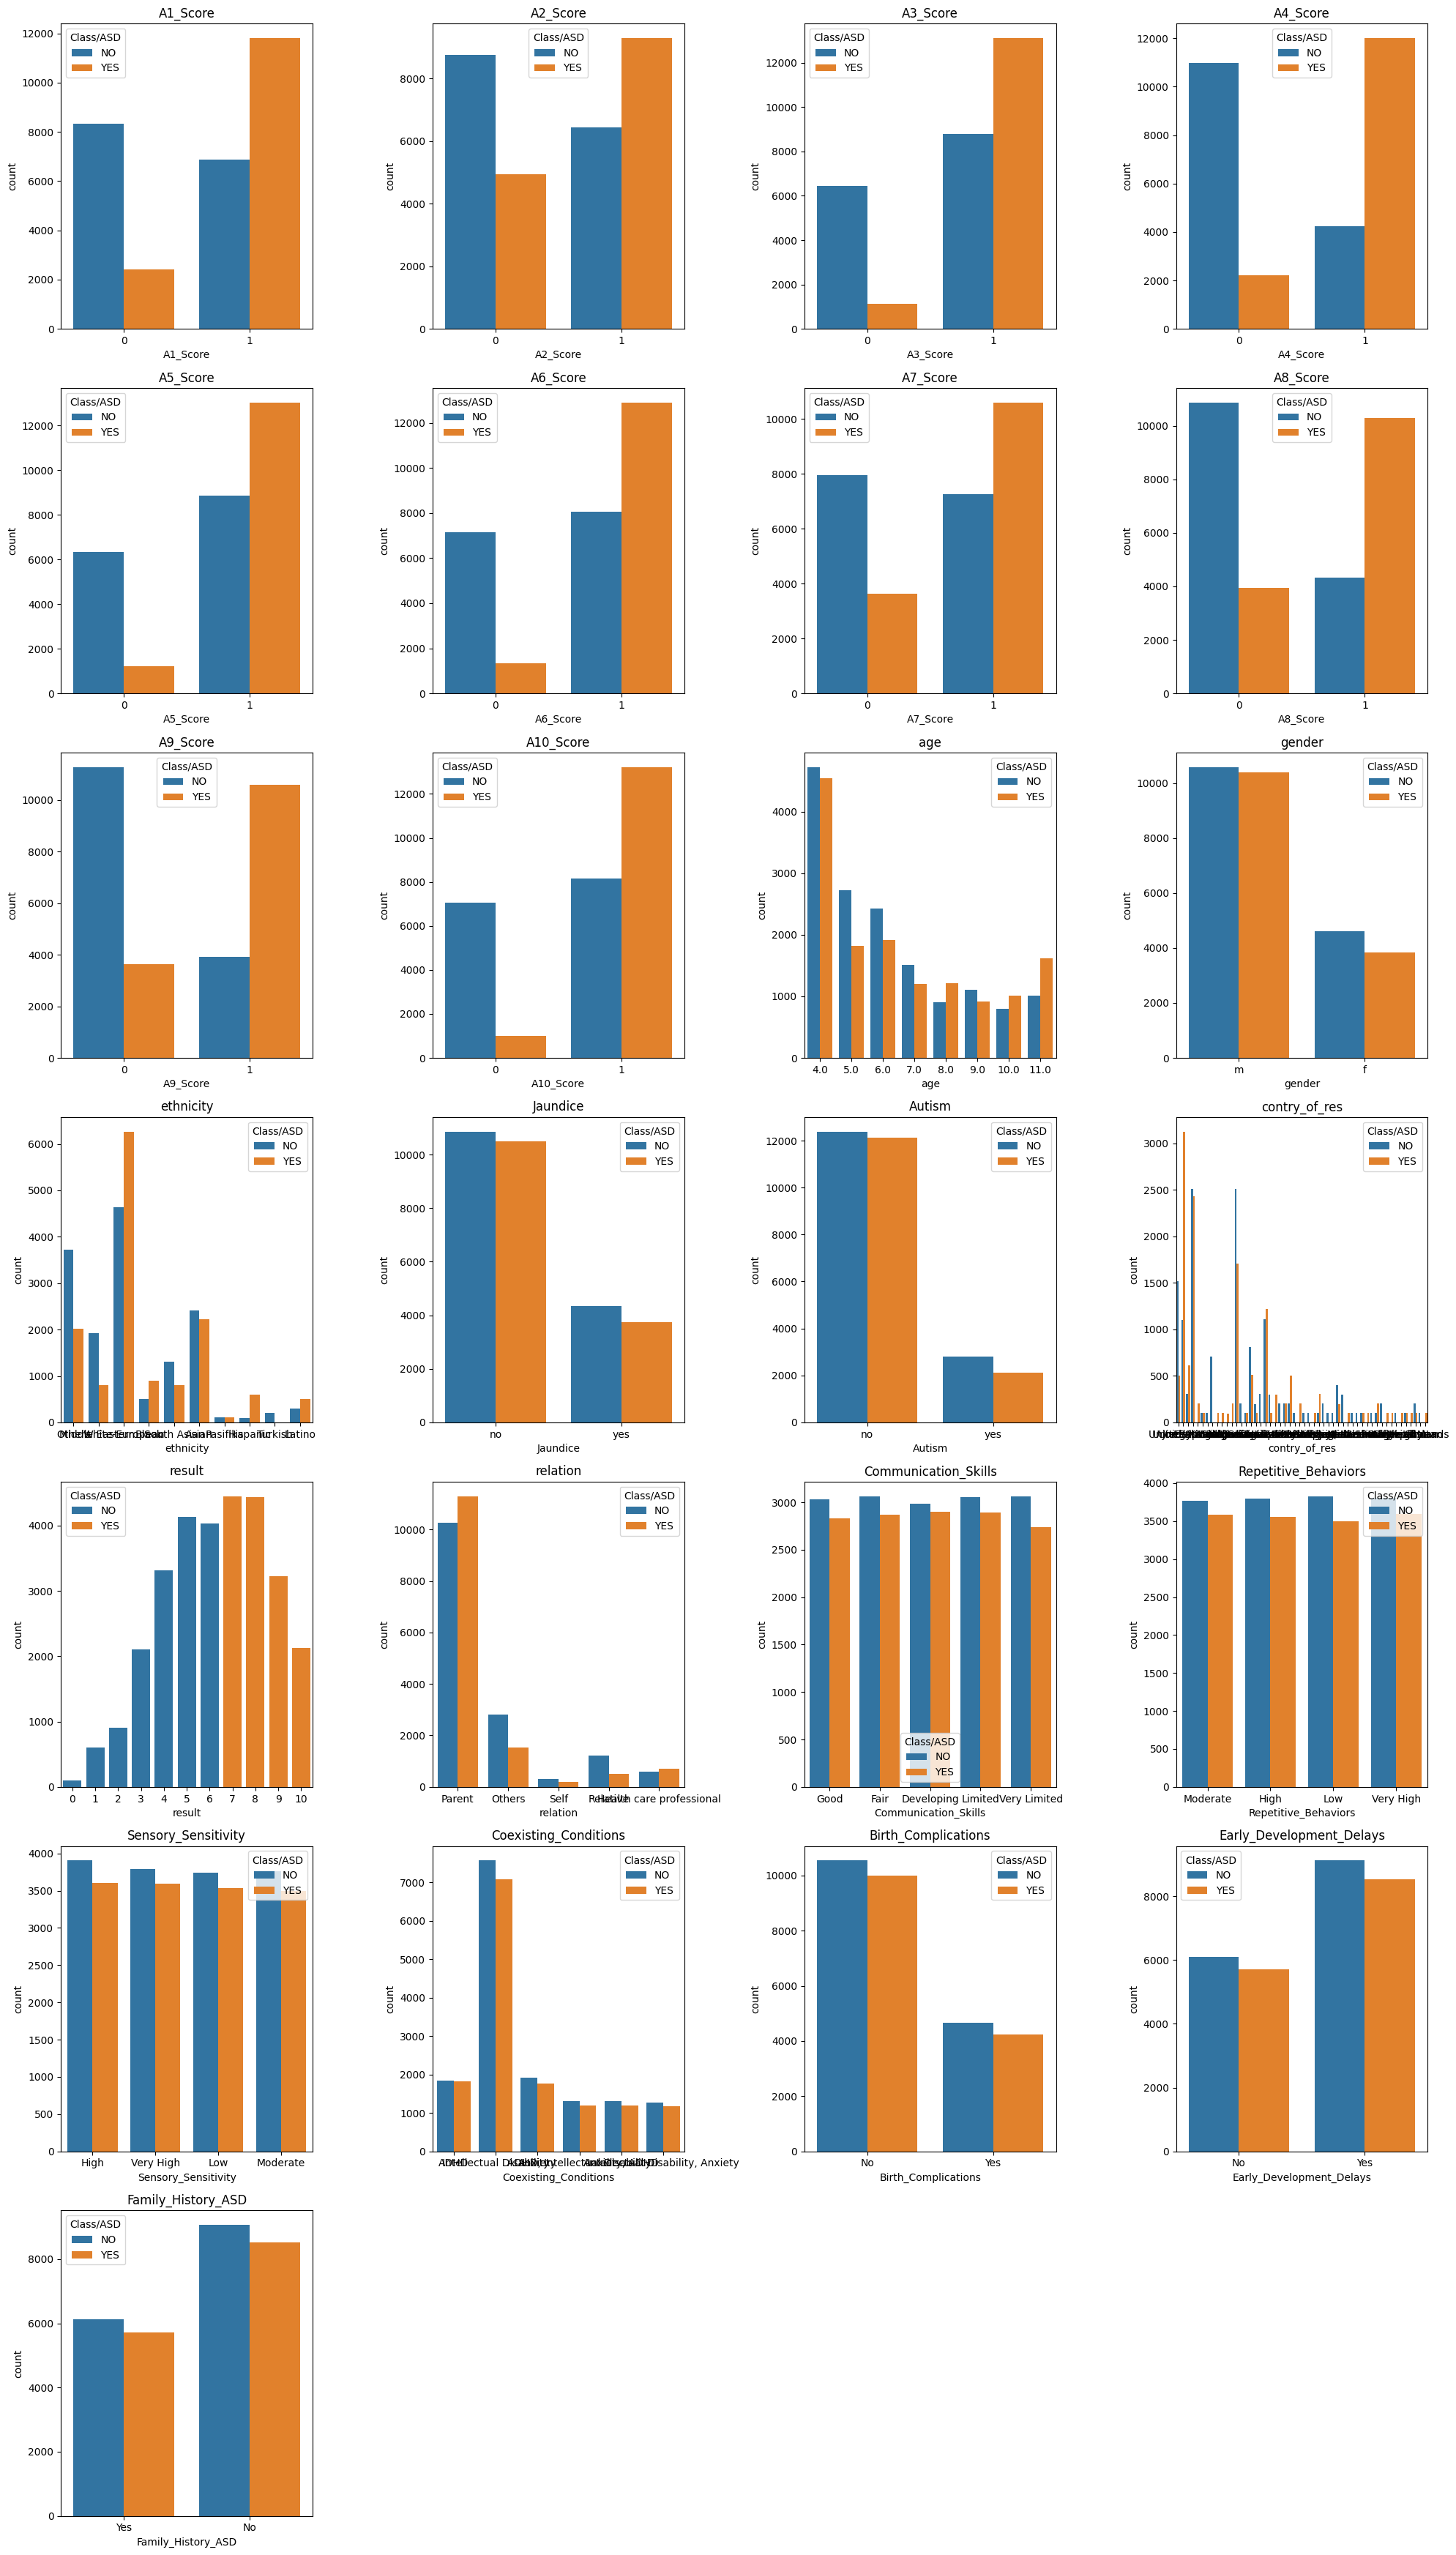

In [22]:
fig, axes = plt.subplots(7, 4, figsize=(20, 35))
axes = axes.ravel()

# Iterate through the columns, excluding the target column
for i, col in enumerate(df.columns.drop('Class/ASD')):
    # Ensure there is variation in the data
    if df[col].nunique() > 1:
        # Pass the DataFrame 'df' to the 'data' parameter
        sns.countplot(x=df[col],hue='Class/ASD', data=df, ax=axes[i])
        axes[i].set_title(col)
    else:
        # Handle columns with no variation
        axes[i].text(0.5, 0.5, 'No variation', horizontalalignment='center', verticalalignment='center')
        axes[i].set_title(col)
        axes[i].set_xticks([])
        axes[i].set_yticks([])

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Analyzing each column</p>

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Ethnicity</p>

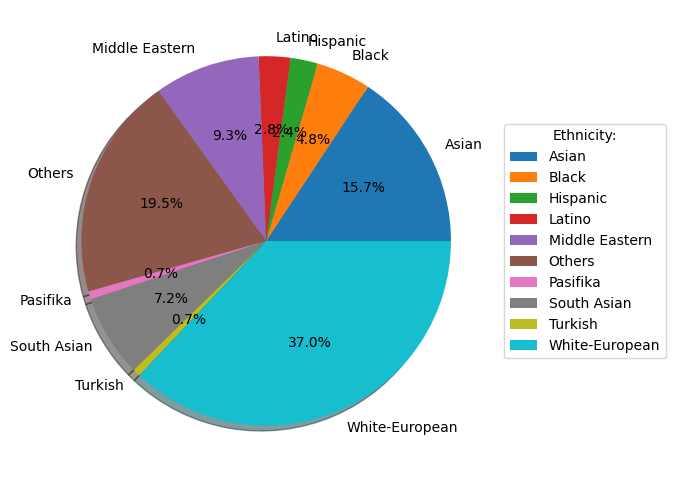

In [23]:
# Calculate the sizes for each ethnicity category
sizes = df.groupby('ethnicity').size()

# Get the labels present in the data
labels_in_data = sizes.index.tolist()

# Plot the pie chart using the labels from the data
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels_in_data, shadow=True, autopct='%1.1f%%')
plt.legend(title="Ethnicity:", labels=labels_in_data, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**CONCLUSION:**
- In our dataset the percentage of White European is maximum

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ASD cases by Ethnicity</p>

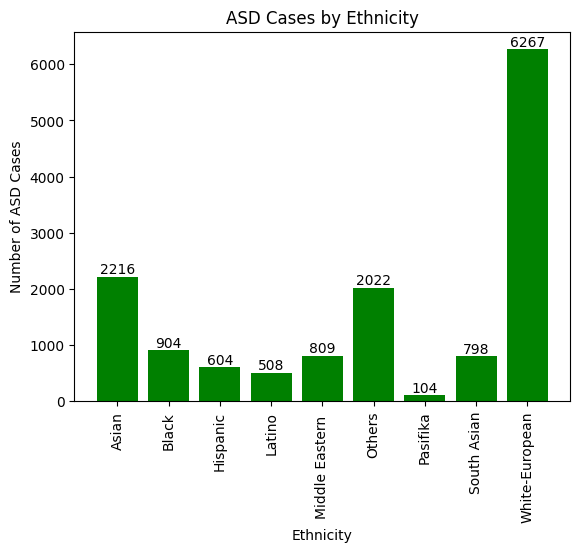

In [24]:
asd_counts_ethnicity = df[df['Class/ASD'] == 'YES'].groupby('ethnicity').size()
bars=plt.bar(asd_counts_ethnicity.index, asd_counts_ethnicity.values,color='green')
plt.xlabel('Ethnicity')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Ethnicity')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

**CONCLUSION:**
- White European ethnicity has maximum no of ASD cases followed by Asian

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ASD cases by GENDER</p>

In [25]:
df[df['Class/ASD'] == 'YES'].groupby('gender').size()

gender
f     3828
m    10404
dtype: int64

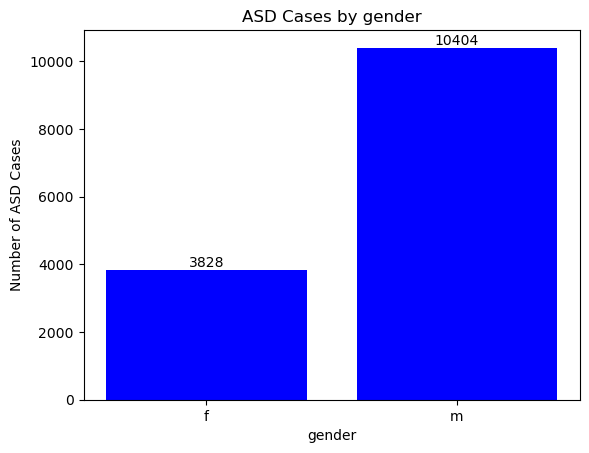

In [ ]:
asd_counts_sex = df[df['Class/ASD'] == 'YES'].groupby('gender').size()
bars=plt.bar(asd_counts_sex.index, asd_counts_sex.values,color='blue')
plt.xlabel('gender')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by gender')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

**CONCLUSION:**
- Males are more prone to ASD in comparision to Females

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ASD cases by Jaundice</p>

In [26]:
df.groupby('Jaundice').size()

Jaundice
no     21349
yes     8086
dtype: int64

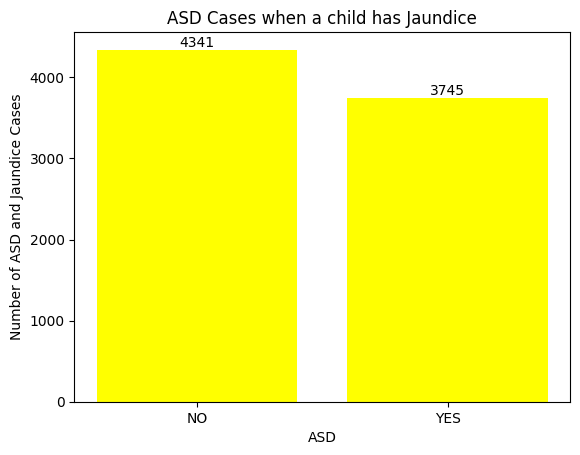

In [27]:
# Children who have Jaundice and then they have ASD

asd_counts_jaundice = df[df['Jaundice']=='yes'].groupby('Class/ASD').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values,color='yellow')
plt.xlabel('ASD')
plt.ylabel('Number of ASD and Jaundice Cases')
plt.title('ASD Cases when a child has Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

**Conclusion :**
- Childrens having Jaundice are less prone to ASD in comparision to Autistic childrens.

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ASD cases by WHO COMPLETED THE TEST (Relation)</p>

In [28]:
df.groupby("relation").size()

relation
Health care professional     1308
Others                       4339
Parent                      21568
Relative                     1712
Self                          508
dtype: int64

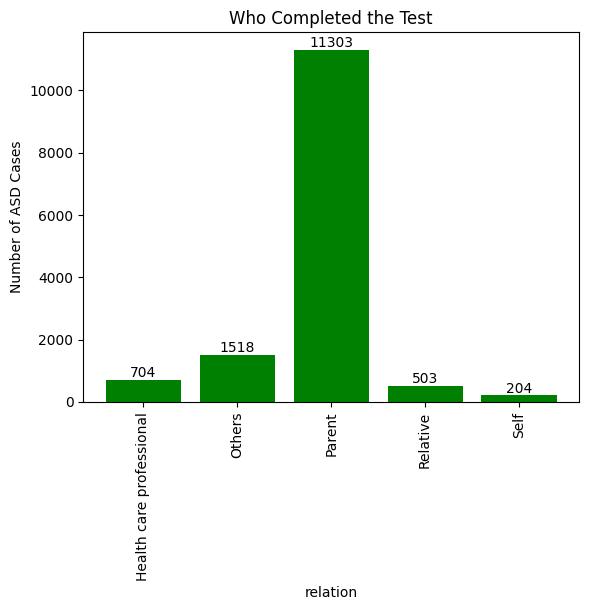

In [29]:
asd_counts = df[df['Class/ASD'] == 'YES'].groupby('relation').size()
bars=plt.bar(asd_counts.index, asd_counts.values,color='green')
plt.xlabel('relation')
plt.ylabel('Number of ASD Cases')
plt.title('Who Completed the Test')
plt.xticks(rotation='vertical')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

**Conclusion :**
- In most of the ASD cases around the world the test is completed by Parents

  <a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ASD cases by AGE</p>

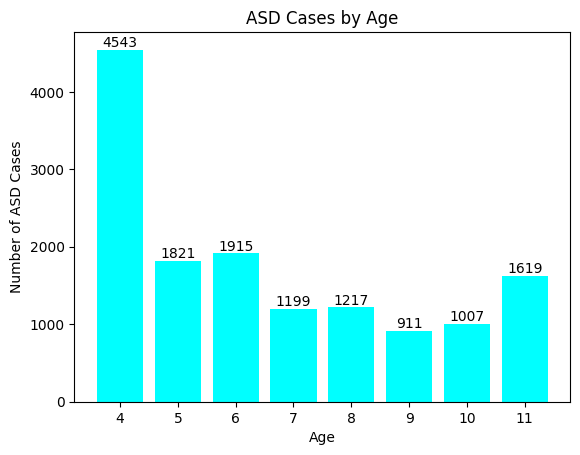

In [30]:
asd_counts = df[df['Class/ASD'] == 'YES'].groupby('age').size()
bars=plt.bar(asd_counts.index, asd_counts.values,color='cyan')
plt.xlabel('Age')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Age')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

**Conclusion :**
- children with age 4 years have most ASD cases around the world

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ASD cases by Result</p>

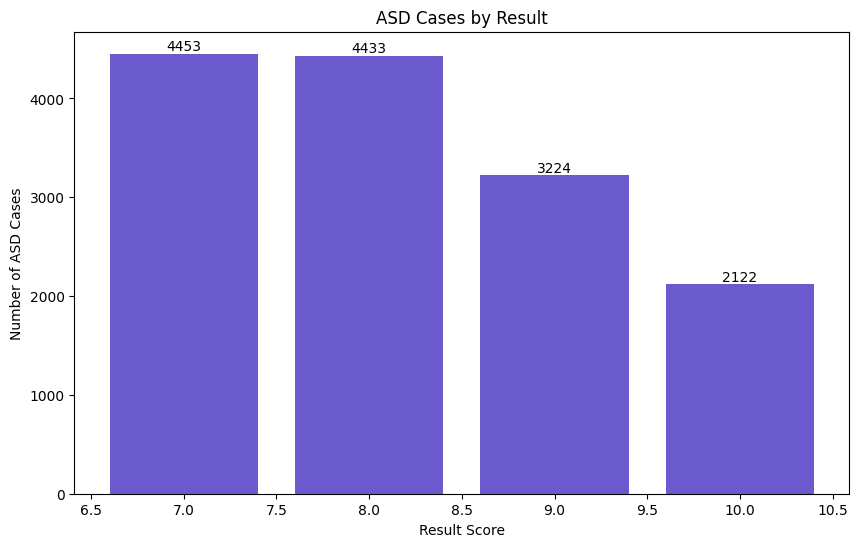

In [31]:
# Verify data filtering and grouping
asd_counts = df[df['Class/ASD'] == 'YES'].groupby('result').size()

# Check if asd_counts is empty
if asd_counts.empty:
    print("No data for 'Class/ASD' == 'Yes' or 'result' column.")
else:
    # Plot the data
    plt.figure(figsize=(10, 6))
    bars = plt.bar(asd_counts.index, asd_counts.values,color='slateblue')
    plt.xlabel('Result Score')
    plt.ylabel('Number of ASD Cases')
    plt.title('ASD Cases by Result')

    # Add text labels on the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

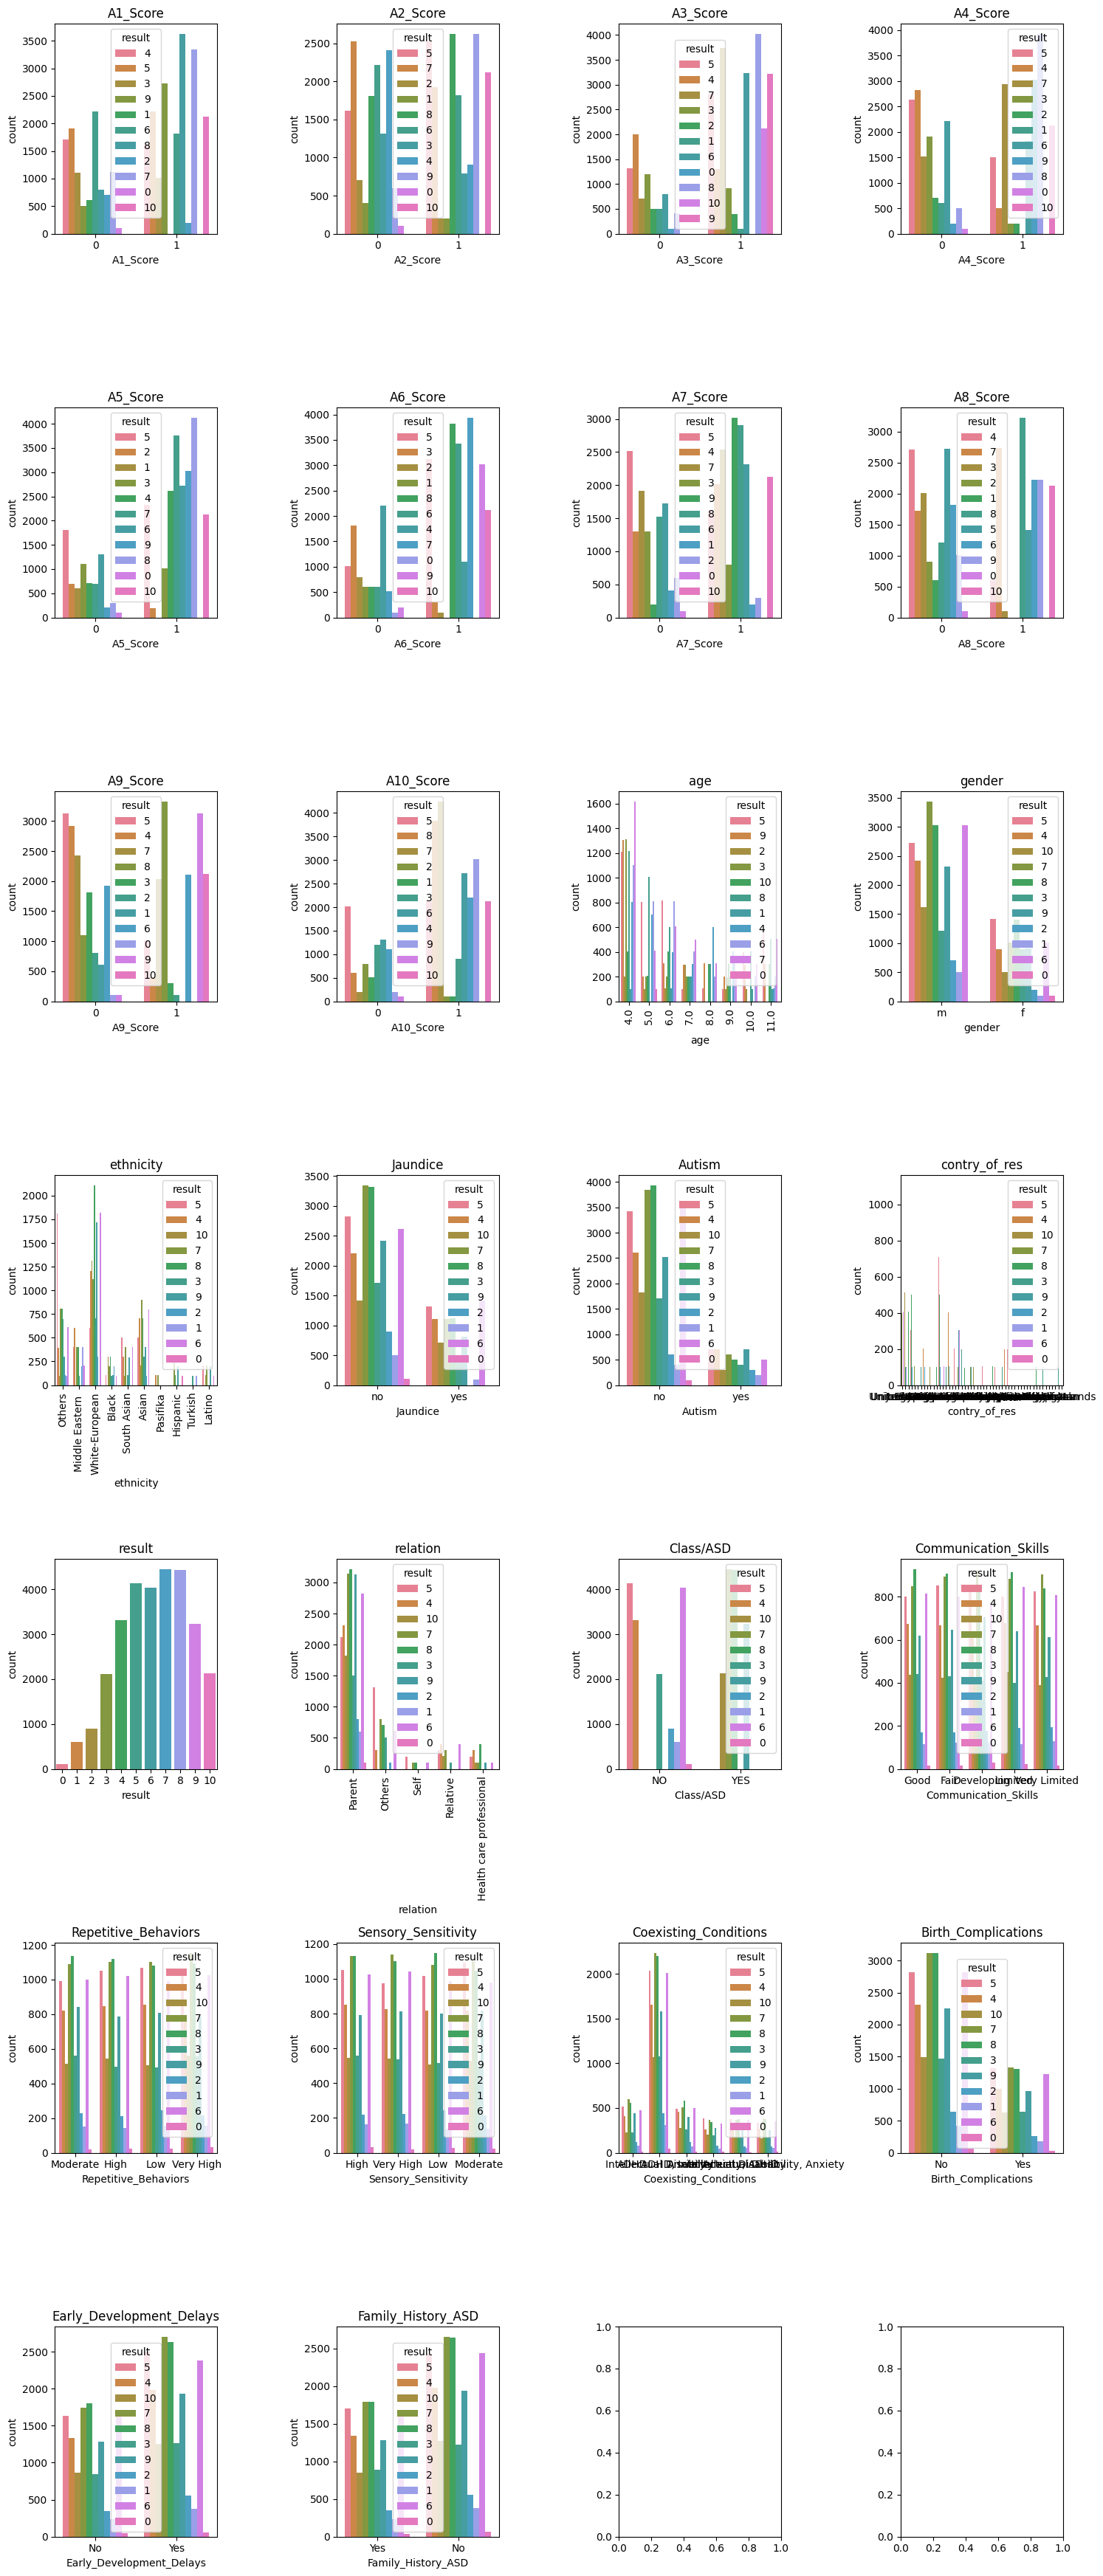

In [32]:
fig, axes = plt.subplots(7, 4, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(df.iloc[:, :]):
    sns.countplot(hue=df["result"].sort_values().astype('str'), x=df[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "relation" or col == "ethnicity" or col == "age":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

**Conclusion :**
- The children with result score > 6.5 are more prone to ASD

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ASD cases by COMMUNICATION SKILLS</p>

In [33]:
df[df['Class/ASD'] == 'YES']['Communication_Skills'].value_counts()

Communication_Skills
Developing      2898
Limited         2890
Fair            2869
Good            2835
Very Limited    2740
Name: count, dtype: int64

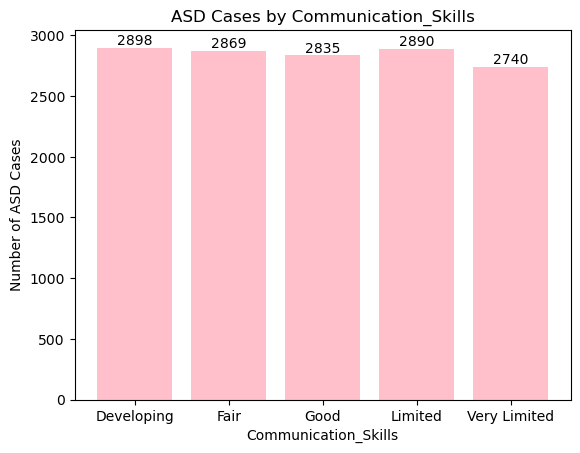

In [ ]:
asd_counts = df[df['Class/ASD'] == 'YES'].groupby('Communication_Skills').size()
bars=plt.bar(asd_counts.index, asd_counts.values,color='pink')
plt.xlabel('Communication_Skills')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Communication_Skills')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

**Conclusion :**
- The communicating skills developing is highest in children with ASD

 <a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ASD cases by REPETATIVE BEHAVIOUR</p>

In [34]:
df.groupby("Repetitive_Behaviors").size().sort_values()

Repetitive_Behaviors
Low          7325
High         7355
Moderate     7355
Very High    7400
dtype: int64

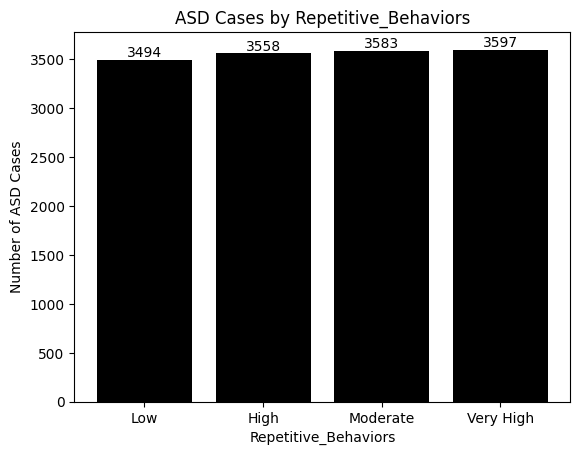

In [35]:
asd_counts = df[df['Class/ASD'] == 'YES'].groupby('Repetitive_Behaviors').size().sort_values()
bars=plt.bar(asd_counts.index, asd_counts.values,color='black')
plt.xlabel('Repetitive_Behaviors')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Repetitive_Behaviors')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

**Conclusion :**
- The Repetitive Behaviour for category - "VERY HIGH" is highest in children with ASD

- <a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ASD cases by SENSORY SENSITIVITY</p>

In [36]:
df.groupby("Sensory_Sensitivity").size()

Sensory_Sensitivity
High         7505
Low          7281
Moderate     7258
Very High    7391
dtype: int64

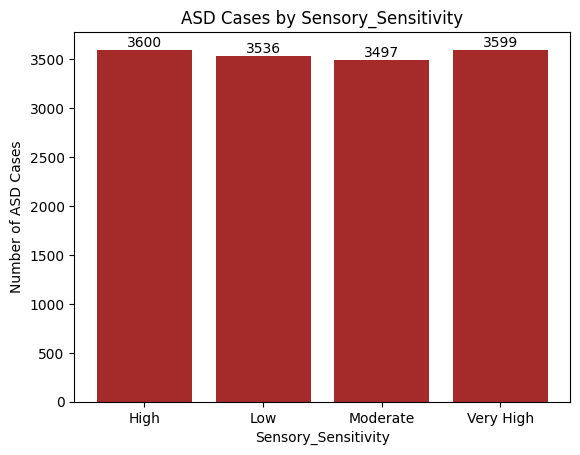

In [37]:
asd_counts = df[df['Class/ASD'] == 'YES'].groupby('Sensory_Sensitivity').size()
bars=plt.bar(asd_counts.index, asd_counts.values,color='brown')
plt.xlabel('Sensory_Sensitivity')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Sensory_Sensitivity')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

**Conclusion :**
- The Sensory Sensitivty for category 'High' is highest in children with ASD

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ASD cases by COEXISTING CONDITION</p>

In [38]:
df.groupby("Coexisting_Conditions").size()

Coexisting_Conditions
ADHD                                 3669
ADHD, Intellectual Disability        2488
Anxiety                              3684
Anxiety, ADHD                        2503
Intellectual Disability             14656
Intellectual Disability, Anxiety     2435
dtype: int64

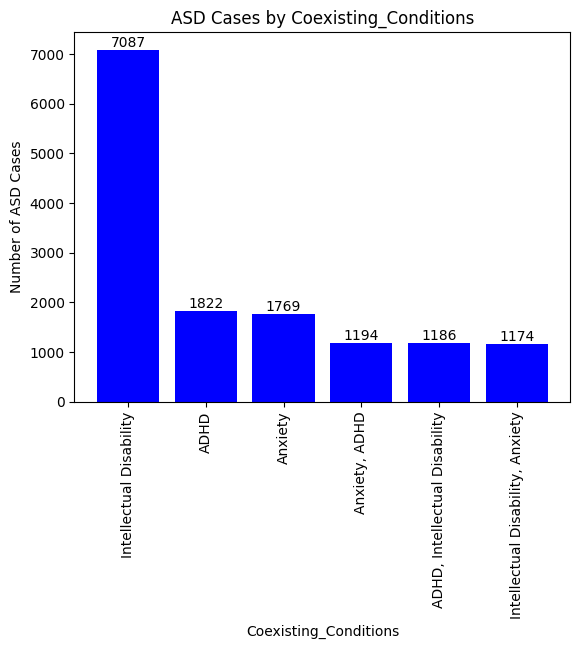

In [39]:
asd_counts = df[df['Class/ASD'] == 'YES'].groupby('Coexisting_Conditions').size().sort_values(ascending=False)
bars=plt.bar(asd_counts.index, asd_counts.values,color='blue')
plt.xlabel('Coexisting_Conditions')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Coexisting_Conditions')
plt.xticks(rotation='vertical')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

**Conclusion :**
- The Coexisting Codition for category 'Intellectual Disability' is highest in children with ASD

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ASD cases by BIRTH COMPLICATION</p>

In [40]:
df.groupby("Birth_Complications").size()

Birth_Complications
No     20529
Yes     8906
dtype: int64

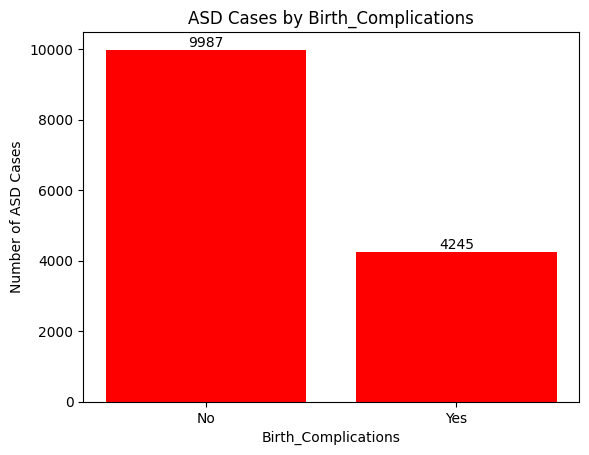

In [41]:
asd_counts = df[df['Class/ASD'] == 'YES'].groupby('Birth_Complications').size()
bars=plt.bar(asd_counts.index, asd_counts.values,color='red')
plt.xlabel('Birth_Complications')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Birth_Complications')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

**Conclusion :**
- There are less Birth Complications in children with ASD

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ASD cases by EARLY DEVLOPMENTAL DELAYS</p>

In [42]:
df.groupby("Early_Development_Delays").size()

Early_Development_Delays
No     11788
Yes    17647
dtype: int64

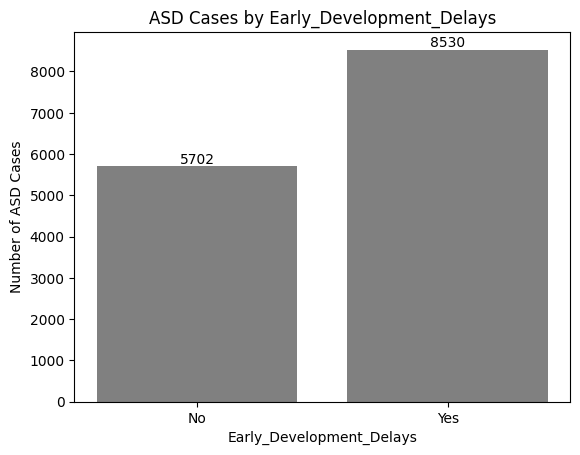

In [43]:
asd_counts = df[df['Class/ASD'] == 'YES'].groupby('Early_Development_Delays').size()
bars=plt.bar(asd_counts.index, asd_counts.values,color='grey')
plt.xlabel('Early_Development_Delays')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Early_Development_Delays')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

**Conclusion :**
- The Early Developmental Delays are more in children with ASD

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ASD cases by QUESTION COLUMNS</p>

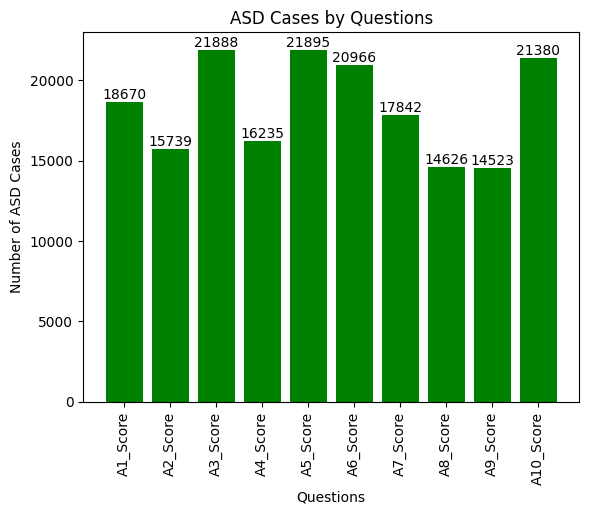

In [44]:
question_columns=df[df['Class/ASD'] == 'YES']
sums=df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score']].sum()
bars=plt.bar(sums.index,sums.values,color='green')
plt.xlabel('Questions')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Questions')
plt.xticks(rotation='vertical')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

**Conclusion :**
- A5_score is high - Q) Does your child pretend and play?
- So based on this question, The autistic children lags imagination and empathy

<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSION</p>

- Males are more prone to ASD in comparision to females.
- 4 year old children have highest number of ASD cases around the world.
- Children with 4 years of age are more prone to ASD.
- Childrens having Jaundice are less prone to ASD in comparision to Autistic childrens.
- Children suffering from Autism shows lack in imagination & social interactions.
- Birth Complications are less in children suffering from ASD.
- Children suffering from ASD are sensory sensitive
- Repetitive Behaviour is displyed by children suffering from ASD

<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Label Encoding</p>

In [45]:
list_lbl=['gender', 'ethnicity', 'Jaundice', 'Autism', 'contry_of_res', 'relation',
       'Class/ASD', 'Communication_Skills', 'Repetitive_Behaviors',
       'Sensory_Sensitivity', 'Coexisting_Conditions', 'Birth_Complications',
       'Early_Development_Delays', 'Family_History_ASD']
lbl_encoder=LabelEncoder()
encoded_cat_df=pd.DataFrame()

for col in list_lbl:
    encoded_cat_df[col]= lbl_encoder.fit_transform(cat_df[col])

encoded_cat_df

,gender,ethnicity,Jaundice,Autism,contry_of_res,relation,Class/ASD,Communication_Skills,Repetitive_Behaviors,Sensory_Sensitivity,Coexisting_Conditions,Birth_Complications,Early_Development_Delays,Family_History_ASD
0,1,5,0,0,24,2,0,2,2,0,0,0,0,1
1,1,4,0,0,24,2,0,1,2,3,4,0,1,0
2,1,5,0,0,24,1,0,0,2,1,0,0,1,0
3,0,5,1,0,24,1,0,2,2,2,2,0,1,0
4,1,5,1,0,51,2,1,1,2,2,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29430,1,5,0,0,51,2,0,4,3,0,4,0,0,0
29431,0,7,0,0,2,0,1,3,2,2,5,0,0,1
29432,1,5,0,0,50,2,0,3,2,2,4,1,0,1
29433,1,9,0,0,50,2,0,1,2,1,4,0,1,1


<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Concating Categorical and Numerical Columns</p>

In [46]:
new_df=pd.concat([encoded_cat_df,df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score','age','result']]],axis=1)
new_df.dropna(axis=0,inplace=True)
new_df.head()

,gender,ethnicity,Jaundice,Autism,contry_of_res,relation,Class/ASD,Communication_Skills,Repetitive_Behaviors,Sensory_Sensitivity,...,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
0,1.0,5.0,0.0,0.0,24.0,2.0,0.0,2.0,2.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,5.0
1,1.0,4.0,0.0,0.0,24.0,2.0,0.0,1.0,2.0,3.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,5.0
2,1.0,5.0,0.0,0.0,24.0,1.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,6.0,5.0
3,0.0,5.0,1.0,0.0,24.0,1.0,0.0,2.0,2.0,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,4.0
4,1.0,5.0,1.0,0.0,51.0,2.0,1.0,1.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,10.0


<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Train-Test Split</p>

In [47]:
X=new_df.drop('Class/ASD',axis=1)
y=new_df['Class/ASD']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(23111, 25) (5778, 25)
(23111,) (5778,)


<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Apply Standard scaler to all features</p>

In [49]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(23111, 25) (5778, 25)
(23111,) (5778,)


<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Model Building</p>

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Logistic Regression</p>

Cross validation recall score 0.39578820230201156
Train recall score 0.40226781857451405
Test recall score 0.38448095071653265
ROC-AUC score 0.526316580946199

-------------------------- CLASSIFICATION REPORT --------------------------------------

              precision    recall  f1-score   support

         0.0       0.53      0.67      0.59      2917
         1.0       0.53      0.38      0.45      2861

    accuracy                           0.53      5778
   macro avg       0.53      0.53      0.52      5778
weighted avg       0.53      0.53      0.52      5778

-------------------------- CONFUSION MATRIX ---------------------------------------------



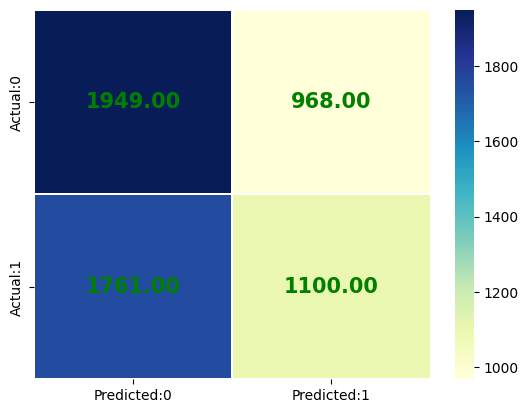

In [50]:

lg_model=LogisticRegression(random_state=42)
lg_model.fit(X_train,y_train)

lg_score=cross_val_score(lg_model,X_train,y_train,cv=5,scoring="recall")
print("Cross validation recall score",lg_score.mean())

ypred_lg_train=lg_model.predict(X_train)
print("Train recall score",recall_score(y_train,ypred_lg_train))

ypred_lg_test=lg_model.predict(X_test)
print("Test recall score",recall_score(y_test,ypred_lg_test))

print("ROC-AUC score",roc_auc_score(y_test,ypred_lg_test))

print()

print("-------------------------- CLASSIFICATION REPORT --------------------------------------")
print()

print(classification_report(y_test,ypred_lg_test))

print("-------------------------- CONFUSION MATRIX ---------------------------------------------")
print()

con_mat=confusion_matrix(y_test,ypred_lg_test)
con_mat

sns.heatmap(con_mat, annot = False, fmt = 'd', cmap = "YlGnBu", cbar = True,
            linewidths = 0.1, annot_kws = {'size':25},xticklabels=['Predicted:0','Predicted:1'],yticklabels= ['Actual:0','Actual:1'])
# Manually annotate all cells

for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        plt.text(j+0.5, i+0.5, format(con_mat[i,j], ".2f"), ha="center", va="center", color="green",fontweight='bold',fontsize=15)

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Decision Tree</p>

Cross validation recall score 0.7958050056017748
Train recall score 0.999820014398848
Test recall score 0.7930793428871024
ROC-AUC score 0.7950655541998076

-------------------------- CLASSIFICATION REPORT --------------------------------------

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      2917
         1.0       0.79      0.79      0.79      2861

    accuracy                           0.80      5778
   macro avg       0.80      0.80      0.80      5778
weighted avg       0.80      0.80      0.80      5778

-------------------------- CONFUSION MATRIX ---------------------------------------------



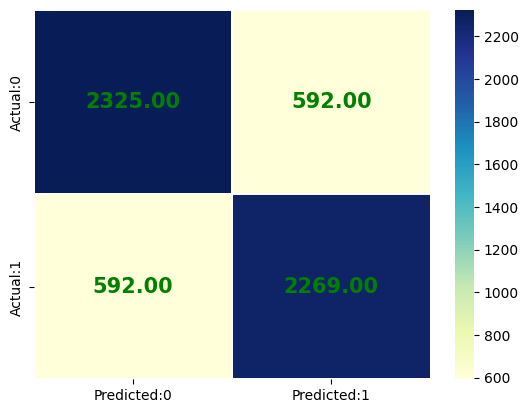

In [51]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

dt_score=cross_val_score(dt_model,X_train,y_train,cv=5,scoring="recall")
print("Cross validation recall score",dt_score.mean())

ypred_dt_train=dt_model.predict(X_train)
print("Train recall score",recall_score(y_train,ypred_dt_train))

ypred_dt_test=dt_model.predict(X_test)
print("Test recall score",recall_score(y_test,ypred_dt_test))

print("ROC-AUC score",roc_auc_score(y_test,ypred_dt_test))

print()

print("-------------------------- CLASSIFICATION REPORT --------------------------------------")
print()

print(classification_report(y_test,ypred_dt_test))

print("-------------------------- CONFUSION MATRIX ---------------------------------------------")
print()

con_mat=confusion_matrix(y_test,ypred_dt_test)
con_mat

sns.heatmap(con_mat, annot = False, fmt = 'd', cmap = "YlGnBu", cbar = True,
            linewidths = 0.1, annot_kws = {'size':25},xticklabels=['Predicted:0','Predicted:1'],yticklabels= ['Actual:0','Actual:1'])
# Manually annotate all cells

for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        plt.text(j+0.5, i+0.5, format(con_mat[i,j], ".2f"), ha="center", va="center", color="green",fontweight='bold',fontsize=15)

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Random Forest</p>

Cross validation recall score 0.7471193678072261
Train recall score 0.999820014398848
Test recall score 0.7689619014330653
ROC-AUC score 0.8027188663833136

-------------------------- CLASSIFICATION REPORT --------------------------------------

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81      2917
         1.0       0.82      0.77      0.79      2861

    accuracy                           0.80      5778
   macro avg       0.80      0.80      0.80      5778
weighted avg       0.80      0.80      0.80      5778

-------------------------- CONFUSION MATRIX ---------------------------------------------



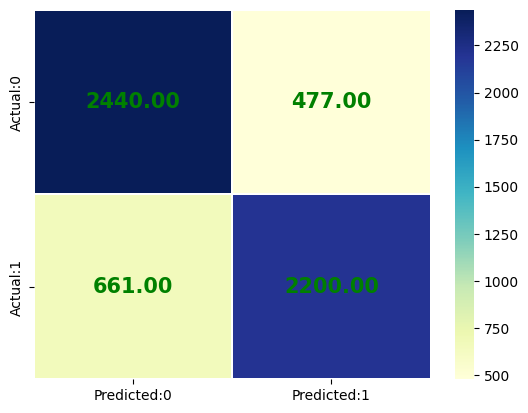

In [52]:
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

rf_score=cross_val_score(rf_model,X_train,y_train,cv=5,scoring="recall")
print("Cross validation recall score",rf_score.mean())

ypred_rf_train=rf_model.predict(X_train)
print("Train recall score",recall_score(y_train,ypred_rf_train))

ypred_rf_test=rf_model.predict(X_test)
print("Test recall score",recall_score(y_test,ypred_rf_test))

print("ROC-AUC score",roc_auc_score(y_test,ypred_rf_test))

print()

print("-------------------------- CLASSIFICATION REPORT --------------------------------------")
print()

print(classification_report(y_test,ypred_rf_test))

print("-------------------------- CONFUSION MATRIX ---------------------------------------------")
print()

con_mat=confusion_matrix(y_test,ypred_rf_test)
con_mat

sns.heatmap(con_mat, annot = False, fmt = 'd', cmap = "YlGnBu", cbar = True,
            linewidths = 0.1, annot_kws = {'size':25},xticklabels=['Predicted:0','Predicted:1'],yticklabels= ['Actual:0','Actual:1'])
# Manually annotate all cells

for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        plt.text(j+0.5, i+0.5, format(con_mat[i,j], ".2f"), ha="center", va="center", color="green",fontweight='bold',fontsize=15)

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ADA Boost</p>

Cross validation recall score 0.6132139934641236
Train recall score 0.999820014398848
Test recall score 0.6312478154491437
ROC-AUC score 0.6450719708030771

-------------------------- CLASSIFICATION REPORT --------------------------------------

              precision    recall  f1-score   support

         0.0       0.65      0.66      0.65      2917
         1.0       0.64      0.63      0.64      2861

    accuracy                           0.65      5778
   macro avg       0.65      0.65      0.65      5778
weighted avg       0.65      0.65      0.65      5778

-------------------------- CONFUSION MATRIX ---------------------------------------------



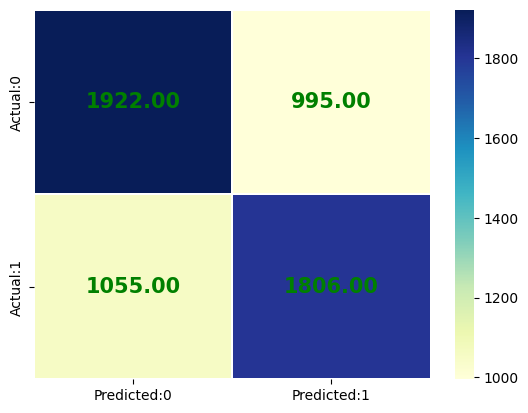

In [53]:
ada_model=AdaBoostClassifier(random_state=42)
ada_model.fit(X_train,y_train)

ada_score=cross_val_score(ada_model,X_train,y_train,cv=5,scoring="recall")
print("Cross validation recall score",ada_score.mean())

ypred_ada_train=rf_model.predict(X_train)
print("Train recall score",recall_score(y_train,ypred_ada_train))


ypred_ada_test=ada_model.predict(X_test)
print("Test recall score",recall_score(y_test,ypred_ada_test))


print("ROC-AUC score",roc_auc_score(y_test,ypred_ada_test))

print()

print("-------------------------- CLASSIFICATION REPORT --------------------------------------")
print()

print(classification_report(y_test,ypred_ada_test))

print("-------------------------- CONFUSION MATRIX ---------------------------------------------")
print()

con_mat=confusion_matrix(y_test,ypred_ada_test)
con_mat

sns.heatmap(con_mat, annot = False, fmt = 'd', cmap = "YlGnBu", cbar = True,
            linewidths = 0.1, annot_kws = {'size':25},xticklabels=['Predicted:0','Predicted:1'],yticklabels= ['Actual:0','Actual:1'])
# Manually annotate all cells

for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        plt.text(j+0.5, i+0.5, format(con_mat[i,j], ".2f"), ha="center", va="center", color="green",fontweight='bold',fontsize=15)

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Gradient Boost</p>

Cross validation recall score 0.6890729963684628
Train recall score 0.6862850971922246
Test recall score 0.6899685424676687
ROC-AUC score 0.7700785461738412

-------------------------- CLASSIFICATION REPORT --------------------------------------

              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79      2917
         1.0       0.82      0.69      0.75      2861

    accuracy                           0.77      5778
   macro avg       0.78      0.77      0.77      5778
weighted avg       0.78      0.77      0.77      5778

-------------------------- CONFUSION MATRIX ---------------------------------------------



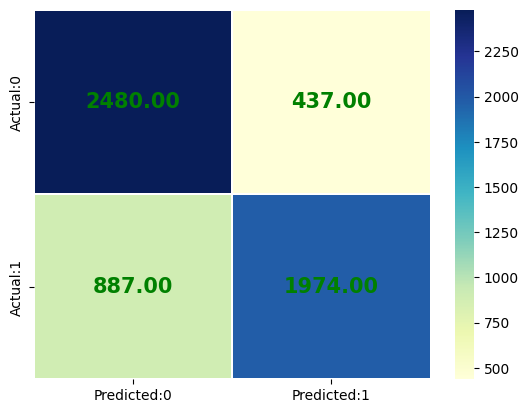

In [54]:
gb_model=GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train,y_train)

gb_score=cross_val_score(gb_model,X_train,y_train,cv=5,scoring="recall")
print("Cross validation recall score",gb_score.mean())

ypred_gb_train=gb_model.predict(X_train)
print("Train recall score",recall_score(y_train,ypred_gb_train))

ypred_gb_test=gb_model.predict(X_test)
print("Test recall score",recall_score(y_test,ypred_gb_test))

print("ROC-AUC score",roc_auc_score(y_test,ypred_gb_test))

print()

print("-------------------------- CLASSIFICATION REPORT --------------------------------------")
print()

print(classification_report(y_test,ypred_gb_test))

print("-------------------------- CONFUSION MATRIX ---------------------------------------------")
print()

con_mat=confusion_matrix(y_test,ypred_gb_test)
con_mat

sns.heatmap(con_mat, annot = False, fmt = 'd', cmap = "YlGnBu", cbar = True,
            linewidths = 0.1, annot_kws = {'size':25},xticklabels=['Predicted:0','Predicted:1'],yticklabels= ['Actual:0','Actual:1'])
# Manually annotate all cells

for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        plt.text(j+0.5, i+0.5, format(con_mat[i,j], ".2f"), ha="center", va="center", color="green",fontweight='bold',fontsize=15)

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">XG Boost</p>

Cross validation recall score 0.8079545606382501
Train recall score 0.8949784017278618
Test recall score 0.8095071653268088
ROC-AUC score 0.8217916354573707

-------------------------- CLASSIFICATION REPORT --------------------------------------

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83      2917
         1.0       0.83      0.81      0.82      2861

    accuracy                           0.82      5778
   macro avg       0.82      0.82      0.82      5778
weighted avg       0.82      0.82      0.82      5778

-------------------------- CONFUSION MATRIX ---------------------------------------------



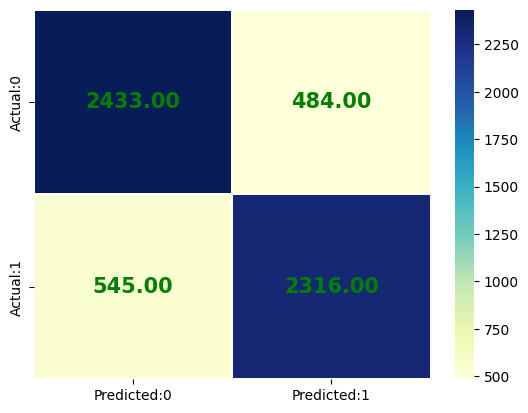

In [55]:
xgb_model=XGBClassifier(random_state=42)
xgb_model.fit(X_train,y_train)

xgb_score=cross_val_score(xgb_model,X_train,y_train,cv=5,scoring="recall")
print("Cross validation recall score",xgb_score.mean())

ypred_xgb_train=xgb_model.predict(X_train)
print("Train recall score",recall_score(y_train,ypred_xgb_train))

ypred_xgb_test=xgb_model.predict(X_test)
print("Test recall score",recall_score(y_test,ypred_xgb_test))

print("ROC-AUC score",roc_auc_score(y_test,ypred_xgb_test))

print()

print("-------------------------- CLASSIFICATION REPORT --------------------------------------")
print()

print(classification_report(y_test,ypred_xgb_test))

print("-------------------------- CONFUSION MATRIX ---------------------------------------------")
print()

con_mat=confusion_matrix(y_test,ypred_xgb_test)
con_mat

sns.heatmap(con_mat, annot = False, fmt = 'd', cmap = "YlGnBu", cbar = True,
            linewidths = 0.1, annot_kws = {'size':25},xticklabels=['Predicted:0','Predicted:1'],yticklabels= ['Actual:0','Actual:1'])
# Manually annotate all cells

for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        plt.text(j+0.5, i+0.5, format(con_mat[i,j], ".2f"), ha="center", va="center", color="green",fontweight='bold',fontsize=15)

**INFERENCE:**
- Applied 6 ML models - Logistic, Decision tree, Random Forest, Ada Boost, Gradient Boost, XG Boost
- XG Boost has given maximum train recall score of 89% and test recall score of 80.9% with Type 2/ FN error count of 545
- Gradient Boost has shown train & test recall score of 68% with Type 2/FN error count of 887
- Decision Tree & Random Forest has shown huge difference in Train recall score - 99% and test recall score  76 - 79%
- AS XG Boost & Gradient Boost has given better recall score and the difference between train & test recall score is minimum,
  we are proceeding further with these 2 models for applylying hyper parameter tuning.

<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Repeated KFold</p>

In [56]:
from sklearn.model_selection import StratifiedKFold, RepeatedKFold
rkf = RepeatedKFold(n_splits=5,n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_rkfcv, X_test_rkfcv = X.iloc[train_index], X.iloc[test_index]
    y_train_rkfcv, y_test_rkfcv = y.iloc[train_index], y.iloc[test_index]

In [57]:
X_train_rkfcv.shape

(23112, 25)

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Logistic Regression with RepeatedKFold</p>

Cross validation recall score 0.3950086622558627
Train recall score 0.40021545919741447
Test recall score 0.4100211714890614
ROC-AUC score 0.5454794950207794

-------------------------- CLASSIFICATION REPORT --------------------------------------

              precision    recall  f1-score   support

         0.0       0.55      0.68      0.61      2943
         1.0       0.55      0.41      0.47      2834

    accuracy                           0.55      5777
   macro avg       0.55      0.55      0.54      5777
weighted avg       0.55      0.55      0.54      5777

-------------------------- CONFUSION MATRIX ---------------------------------------------



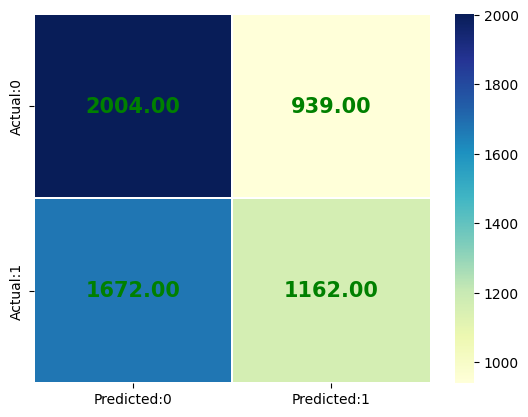

In [58]:
lg_model_cv=LogisticRegression(random_state=42)
lg_model_cv.fit(X_train_rkfcv,y_train_rkfcv)

lg_score_cv=cross_val_score(lg_model,X_train_rkfcv,y_train_rkfcv,cv=5,scoring="recall")
print("Cross validation recall score",lg_score_cv.mean())

ypred_lg_train_cv=lg_model_cv.predict(X_train_rkfcv)
print("Train recall score",recall_score(y_train_rkfcv,ypred_lg_train_cv))

ypred_lg_test_cv=lg_model_cv.predict(X_test_rkfcv)
print("Test recall score",recall_score(y_test_rkfcv,ypred_lg_test_cv))

print("ROC-AUC score",roc_auc_score(y_test_rkfcv,ypred_lg_test_cv))

print()

print("-------------------------- CLASSIFICATION REPORT --------------------------------------")
print()

print(classification_report(y_test_rkfcv,ypred_lg_test_cv))

print("-------------------------- CONFUSION MATRIX ---------------------------------------------")
print()

con_mat=confusion_matrix(y_test_rkfcv,ypred_lg_test_cv)
con_mat

sns.heatmap(con_mat, annot = False, fmt = 'd', cmap = "YlGnBu", cbar = True,
            linewidths = 0.1, annot_kws = {'size':25},xticklabels=['Predicted:0','Predicted:1'],yticklabels= ['Actual:0','Actual:1'])
# Manually annotate all cells

for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        plt.text(j+0.5, i+0.5, format(con_mat[i,j], ".2f"), ha="center", va="center", color="green",fontweight='bold',fontsize=15)

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Gradient Boost with Repeated KFold</p>

Cross validation recall score 0.7006904410454686
Train recall score 0.6967411796391059
Test recall score 0.6905434015525759
ROC-AUC score 0.7751052040042866

-------------------------- CLASSIFICATION REPORT --------------------------------------

              precision    recall  f1-score   support

         0.0       0.74      0.86      0.80      2943
         1.0       0.83      0.69      0.75      2834

    accuracy                           0.78      5777
   macro avg       0.78      0.78      0.77      5777
weighted avg       0.78      0.78      0.77      5777

-------------------------- CONFUSION MATRIX ---------------------------------------------



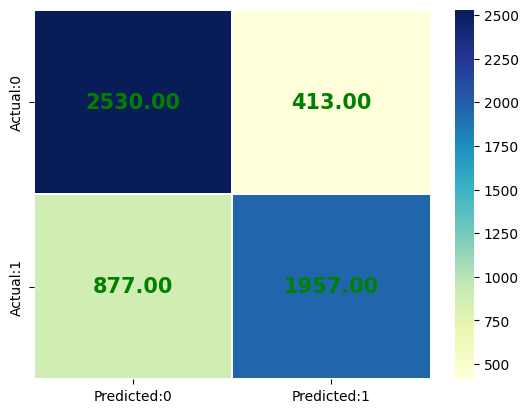

In [59]:
gb_model_cv=GradientBoostingClassifier(random_state=42)
gb_model_cv.fit(X_train_rkfcv,y_train_rkfcv)

gb_score_cv=cross_val_score(gb_model_cv,X_train_rkfcv,y_train_rkfcv,cv=5,scoring="recall")
print("Cross validation recall score",gb_score_cv.mean())

ypred_gb_train_cv=gb_model_cv.predict(X_train_rkfcv)
print("Train recall score",recall_score(y_train_rkfcv,ypred_gb_train_cv))

ypred_gb_test_cv=gb_model_cv.predict(X_test_rkfcv)
print("Test recall score",recall_score(y_test_rkfcv,ypred_gb_test_cv))

print("ROC-AUC score",roc_auc_score(y_test_rkfcv,ypred_gb_test_cv))

print()

print("-------------------------- CLASSIFICATION REPORT --------------------------------------")
print()

print(classification_report(y_test_rkfcv,ypred_gb_test_cv))

print("-------------------------- CONFUSION MATRIX ---------------------------------------------")
print()

con_mat=confusion_matrix(y_test_rkfcv,ypred_gb_test_cv)
con_mat

sns.heatmap(con_mat, annot = False, fmt = 'd', cmap = "YlGnBu", cbar = True,
            linewidths = 0.1, annot_kws = {'size':25},xticklabels=['Predicted:0','Predicted:1'],yticklabels= ['Actual:0','Actual:1'])
# Manually annotate all cells

for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        plt.text(j+0.5, i+0.5, format(con_mat[i,j], ".2f"), ha="center", va="center", color="green",fontweight='bold',fontsize=15)

<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Grid SerachCV & Randmoized SearchCV</p>

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Logistic GridSearch CV</p>

In [60]:
# Define the parameter grid for GridSearchCV to tune regularization strength
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength, smaller values specify stronger regularization.
    'penalty': ['l1', 'l2'],       # Both L1 and L2 penalties
    'solver': ['liblinear', 'saga'] # Solvers that support both L1 and L2 penalties
}

# Initialize GridSearchCV
grid_search_lg = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='recall', verbose=1, n_jobs=-1)

# Fit the model
grid_search_lg.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search_lg.best_params_
best_score = grid_search_lg.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation recall score:", best_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation recall score: 0.40001911122286316


recall score after adding hypertuning parameters 0.3481300244669696
ROC-AUC score 0.5290530136047567

-------------------------- CLASSIFICATION REPORT --------------------------------------

              precision    recall  f1-score   support

         0.0       0.53      0.71      0.60      2917
         1.0       0.54      0.35      0.42      2861

    accuracy                           0.53      5778
   macro avg       0.53      0.53      0.51      5778
weighted avg       0.53      0.53      0.51      5778

-------------------------- CONFUSION MATRIX ---------------------------------------------



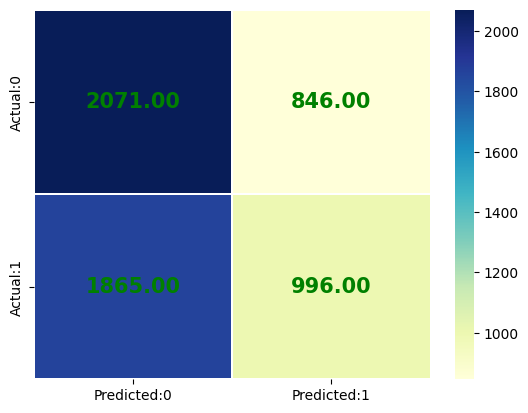

In [61]:
lg_model=LogisticRegression(penalty= 'l1',C=0.01,solver= 'saga',random_state=42)
lg_model.fit(X_train,y_train)

ypred_lg_test=lg_model.predict(X_test)
print("recall score after adding hypertuning parameters",recall_score(y_test,ypred_lg_test))

print("ROC-AUC score",roc_auc_score(y_test,ypred_lg_test))

print()

print("-------------------------- CLASSIFICATION REPORT --------------------------------------")
print()

print(classification_report(y_test,ypred_lg_test))

print("-------------------------- CONFUSION MATRIX ---------------------------------------------")
print()

con_mat=confusion_matrix(y_test,ypred_lg_test)
con_mat

sns.heatmap(con_mat, annot = False, fmt = 'd', cmap = "YlGnBu", cbar = True,
            linewidths = 0.1, annot_kws = {'size':25},xticklabels=['Predicted:0','Predicted:1'],yticklabels= ['Actual:0','Actual:1'])
# Manually annotate all cells

for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        plt.text(j+0.5, i+0.5, format(con_mat[i,j], ".2f"), ha="center", va="center", color="green",fontweight='bold',fontsize=15)

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Gradient Boosting with Randomized Grid Search CV</p>

In [62]:

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search_gb = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=param_dist, n_iter=50, cv=5, scoring='recall', verbose=1, n_jobs=-1)
random_search_gb.fit(X_train, y_train)

best_params = random_search_gb.best_params_
best_score = random_search_gb.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation recall score:", best_score)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 4, 'learning_rate': 0.2}
Best Cross-Validation recall score: 0.8079547630876448


recall score after adding hypertuning parameters 0.7972736805312828
ROC-AUC score 0.8233882972419869

-------------------------- CLASSIFICATION REPORT --------------------------------------

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      2917
         1.0       0.84      0.80      0.82      2861

    accuracy                           0.82      5778
   macro avg       0.82      0.82      0.82      5778
weighted avg       0.82      0.82      0.82      5778

-------------------------- CONFUSION MATRIX ---------------------------------------------



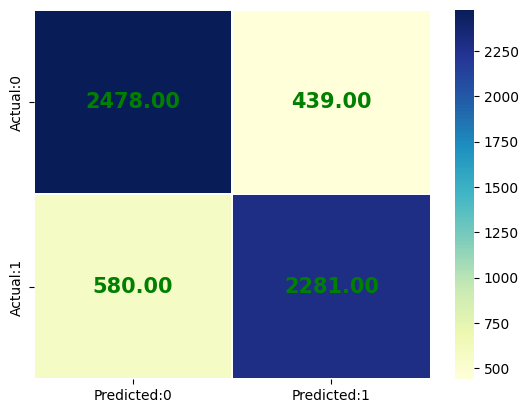

In [63]:

gb_model=GradientBoostingClassifier(subsample= 1.0, n_estimators= 100, min_samples_split= 5, min_samples_leaf= 2, max_features= 'auto', max_depth= 5, learning_rate= 0.2)
gb_model.fit(X_train,y_train)

ypred_gb_test=gb_model.predict(X_test)
print("recall score after adding hypertuning parameters",recall_score(y_test,ypred_gb_test))

print("ROC-AUC score",roc_auc_score(y_test,ypred_gb_test))

print()

print("-------------------------- CLASSIFICATION REPORT --------------------------------------")
print()

print(classification_report(y_test,ypred_gb_test))

print("-------------------------- CONFUSION MATRIX ---------------------------------------------")
print()

con_mat=confusion_matrix(y_test,ypred_gb_test)
con_mat

sns.heatmap(con_mat, annot = False, fmt = 'd', cmap = "YlGnBu", cbar = True,
            linewidths = 0.1, annot_kws = {'size':25},xticklabels=['Predicted:0','Predicted:1'],yticklabels= ['Actual:0','Actual:1'])
# Manually annotate all cells

for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        plt.text(j+0.5, i+0.5, format(con_mat[i,j], ".2f"), ha="center", va="center", color="green",fontweight='bold',fontsize=15)

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">XG Boost with Randomized Search CV</p>

In [64]:

param_dist = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=param_dist, n_iter=50, cv=5, scoring='recall', verbose=1, n_jobs=-1)
random_search_xgb.fit(X_train, y_train)

best_params = random_search_xgb.best_params_
best_score = random_search_xgb.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation recall score:", best_score)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1}
Best Cross-Validation recall score: 0.8138945878393506


recall score after adding hypertuning parameters 0.8053128276826285
ROC-AUC score 0.8196944666352806

-------------------------- CLASSIFICATION REPORT --------------------------------------

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      2917
         1.0       0.83      0.81      0.82      2861

    accuracy                           0.82      5778
   macro avg       0.82      0.82      0.82      5778
weighted avg       0.82      0.82      0.82      5778

-------------------------- CONFUSION MATRIX ---------------------------------------------



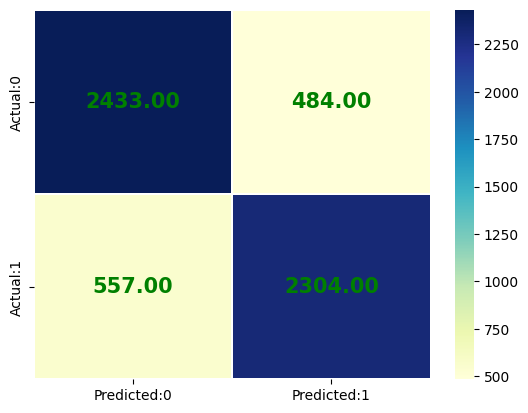

In [65]:

Xgb_model=XGBClassifier(subsample= 1, reg_lambda=0.1, reg_alpha=0.1, n_estimators= 300, max_depth= 5, learning_rate= 0.2,gamma=0)
Xgb_model.fit(X_train,y_train)

ypred_xgb_test=Xgb_model.predict(X_test)
print("recall score after adding hypertuning parameters",recall_score(y_test,ypred_xgb_test))

print("ROC-AUC score",roc_auc_score(y_test,ypred_xgb_test))

print()

print("-------------------------- CLASSIFICATION REPORT --------------------------------------")
print()

print(classification_report(y_test,ypred_xgb_test))

print("-------------------------- CONFUSION MATRIX ---------------------------------------------")
print()

con_mat=confusion_matrix(y_test,ypred_xgb_test)
con_mat

sns.heatmap(con_mat, annot = False, fmt = 'd', cmap = "YlGnBu", cbar = True,
            linewidths = 0.1, annot_kws = {'size':25},xticklabels=['Predicted:0','Predicted:1'],yticklabels= ['Actual:0','Actual:1'])
# Manually annotate all cells

for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        plt.text(j+0.5, i+0.5, format(con_mat[i,j], ".2f"), ha="center", va="center", color="green",fontweight='bold',fontsize=15)

**INFERENCE:**
- Applied GridSearchCV on statistical model - Logistic regression, but we did not see much of a difference in the recall score
- Applied RandomSearchCV on Gradient & XG Boost and it showed improved recall score of 79.72% and 80.53% with FN count of 580 & 557 repectively.

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Summarizing All the Models used</p>

In [66]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_validate # Import KFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
import matplotlib.pyplot as plt


names=[]
acc=[]
pre=[]
recall=[]
roc=[]
f1=[]

n_folds = 5

models = [
     ("Logistic Regression", LogisticRegression(penalty= 'l1',C=0.01,solver= 'saga')),
     ('Random Forest' , RandomForestClassifier()),
     ('Decision Tree',DecisionTreeClassifier()),
     ('AB'   , AdaBoostClassifier()),
     ('GB'  , GradientBoostingClassifier(subsample= 1.0, n_estimators= 100, min_samples_split= 5, min_samples_leaf= 2, max_features= 'auto', max_depth= 5, learning_rate= 0.2)),
     ('XGB', xgb.XGBClassifier(subsample= 0.8, reg_lambda=1, reg_alpha=0, n_estimators= 300, max_depth= 5, learning_rate= 0.1,gamma=0))
     ]


kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)


scoring = {'Accuracy': make_scorer(accuracy_score),
           'Recall': make_scorer(recall_score),
           'F1 Score': make_scorer(f1_score),
           'Precision': make_scorer(precision_score),
           'ROC AUC': make_scorer(roc_auc_score)}

for name, model in models:
    cv_results = cross_validate(model,X_train, y_train, cv=kf, scoring=scoring)
    print(f"{name} - Mean Accuracy: {np.mean(cv_results['test_Accuracy']):.4f}, Mean Recall: {np.mean(cv_results['test_Recall']):.4f}, Mean F1 Score: {np.mean(cv_results['test_F1 Score']):.4f}, Mean Precision: {np.mean(cv_results['test_Precision']):.4f}")
    names.append(name)
    acc.append(round(np.mean(cv_results['test_Accuracy']),4))
    pre.append(round(np.mean(cv_results['test_Precision']),4))
    recall.append(round(np.mean(cv_results['test_Recall']),4))
    f1.append(round(np.mean(cv_results['test_F1 Score']),4))
    roc.append(round(np.mean(cv_results['test_ROC AUC']),4))

Logistic Regression - Mean Accuracy: 0.5417, Mean Recall: 0.3437, Mean F1 Score: 0.4182, Mean Precision: 0.5370
Random Forest - Mean Accuracy: 0.7972, Mean Recall: 0.7534, Mean F1 Score: 0.7812, Mean Precision: 0.8113
Decision Tree - Mean Accuracy: 0.8033, Mean Recall: 0.7960, Mean F1 Score: 0.7955, Mean Precision: 0.7951
AB - Mean Accuracy: 0.6525, Mean Recall: 0.6153, Mean F1 Score: 0.6299, Mean Precision: 0.6458
GB - Mean Accuracy: 0.8211, Mean Recall: 0.7968, Mean F1 Score: 0.8107, Mean Precision: 0.8251
XGB - Mean Accuracy: 0.8230, Mean Recall: 0.8066, Mean F1 Score: 0.8141, Mean Precision: 0.8221


In [67]:
d={'Models':names,'Accuracy Test':acc,'Precision':pre,'Recall':recall,'F1_Score':f1,'Roc Auc':roc}

In [68]:
df_dict=pd.DataFrame(d)

In [69]:
df_dict

,Models,Accuracy Test,Precision,Recall,F1_Score,Roc Auc
0,Logistic Regression,0.5417,0.5370,0.3437,0.4182,0.5348
1,Random Forest,0.7972,0.8113,0.7534,0.7812,0.7955
2,Decision Tree,0.8033,0.7951,0.7960,0.7955,0.8030
3,AB,0.6525,0.6458,0.6153,0.6299,0.6511
4,GB,0.8211,0.8251,0.7968,0.8107,0.8203
5,XGB,0.8230,0.8221,0.8066,0.8141,0.8225


In [70]:
def bar_plots(x, y):
    plt.figure(figsize=(15, 6))
    plt.bar(df_dict[x], df_dict[y], color='skyblue')
    plt.xlabel('Models')
    plt.ylabel(y)
    plt.title(f'{y} of Different Models')
    plt.ylim(0.40, 0.90)
    ylim_range = 0.90 - 0.50
    text_height = ylim_range / 10
    for i, value in enumerate(df_dict[y].tolist()):
        plt.text(i, value + text_height, str(value), ha='center')

    plt.show()

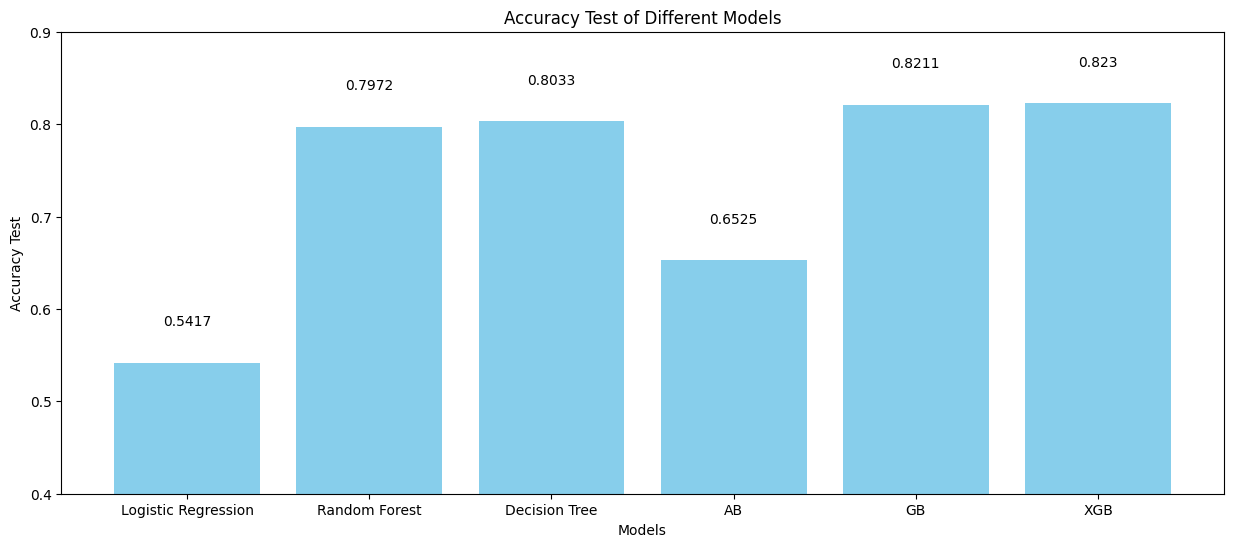

In [71]:
bar_plots('Models','Accuracy Test')

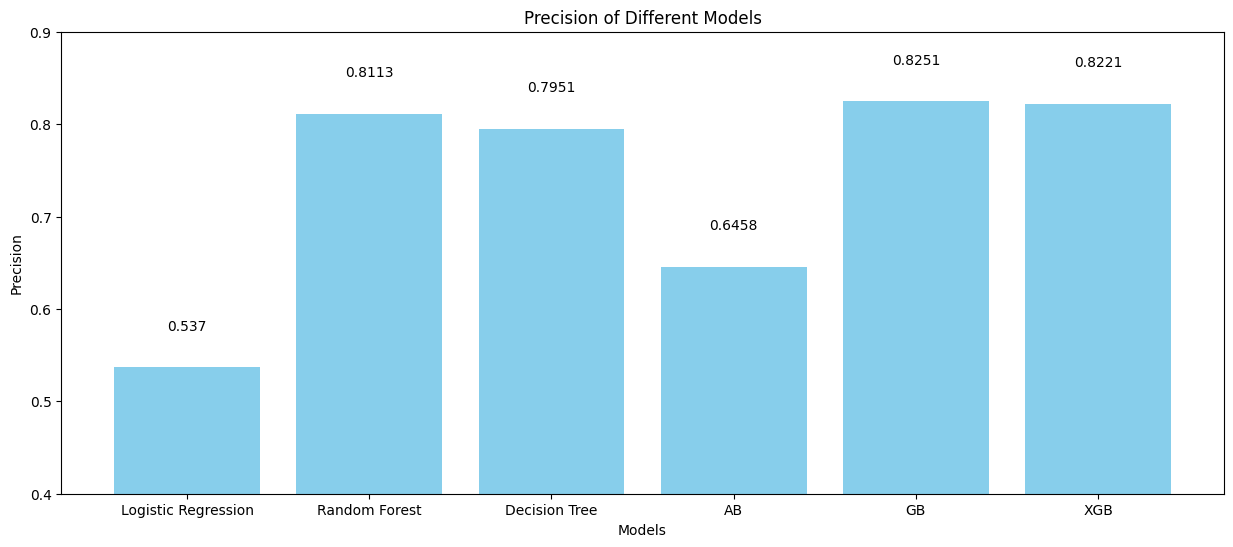

In [72]:
bar_plots('Models','Precision')

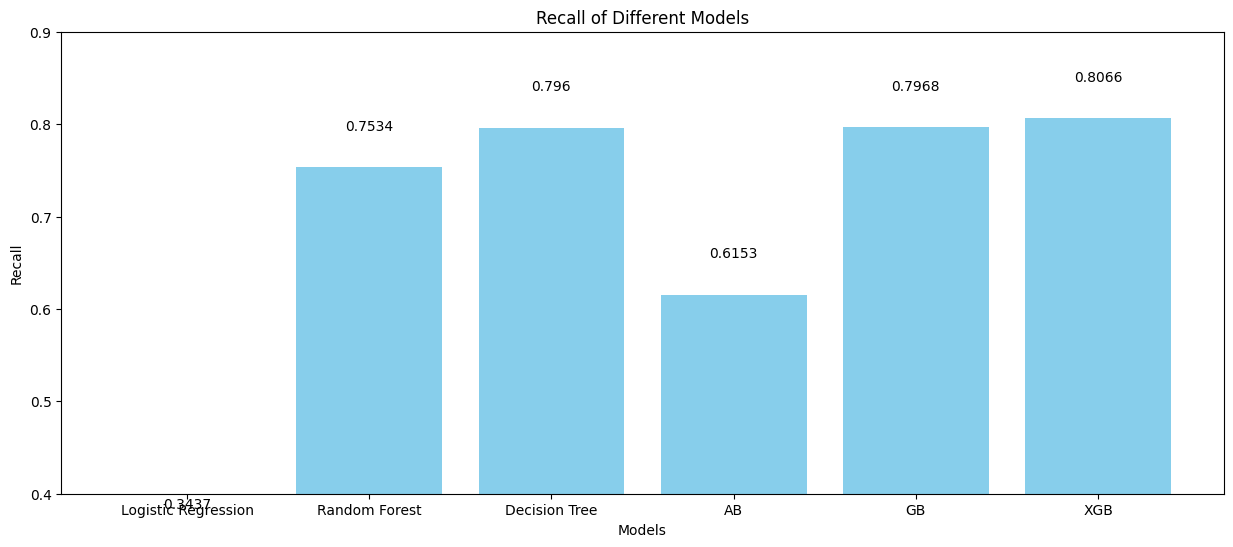

In [73]:
bar_plots('Models','Recall')

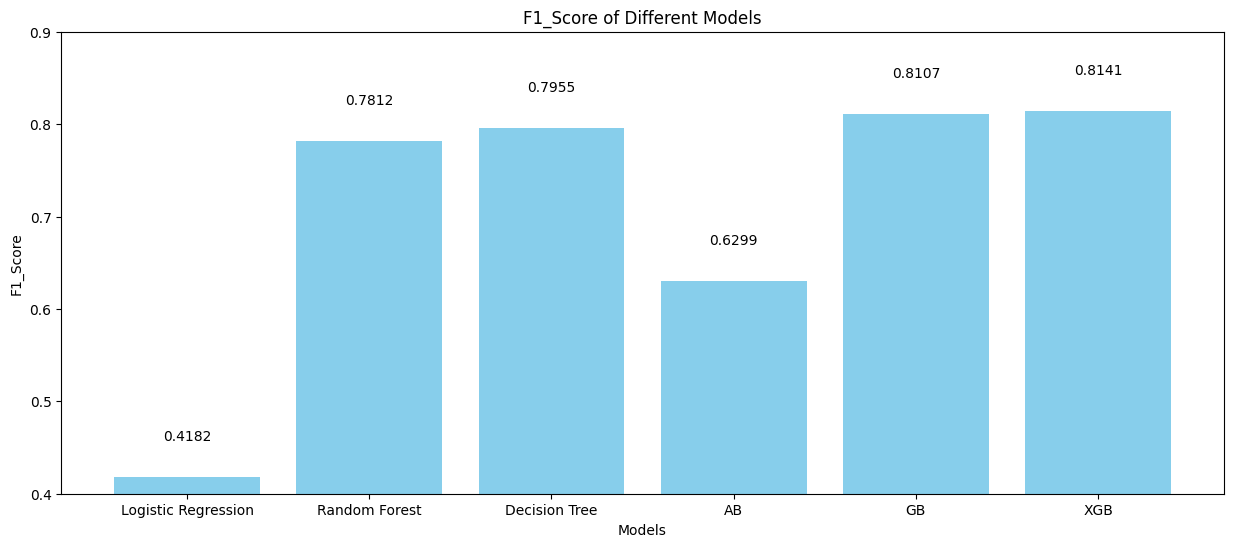

In [74]:
bar_plots('Models','F1_Score')

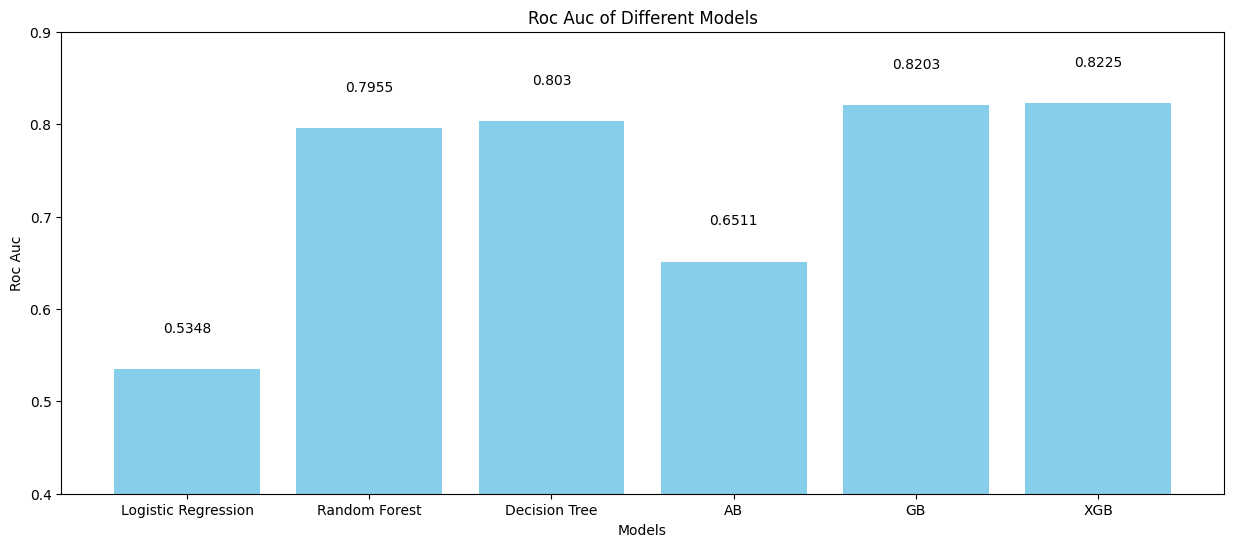

In [75]:
bar_plots('Models','Roc Auc')

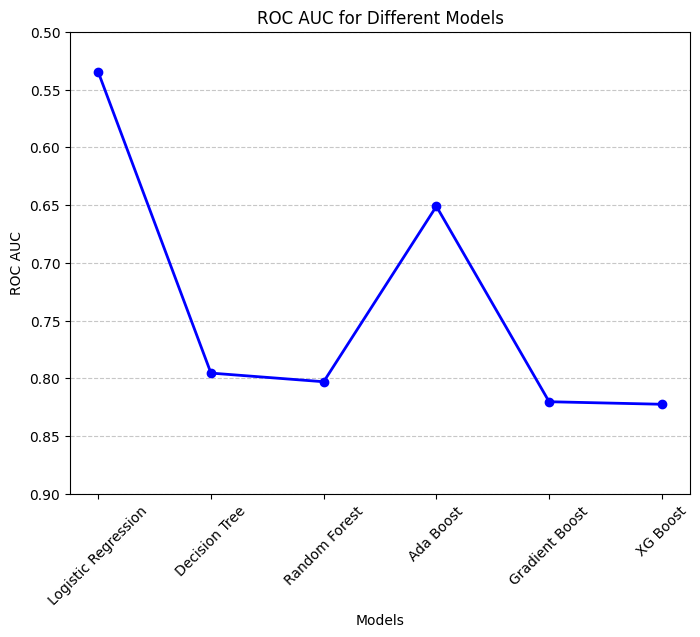

In [76]:
roc_auc_values = df_dict['Roc Auc']

model_names = ['Logistic Regression', 'Decision Tree','Random Forest','Ada Boost', 'Gradient Boost', 'XG Boost']

plt.figure(figsize=(8,6))
plt.plot(model_names, roc_auc_values, marker='o', linestyle='-', color='b', linewidth=2)
assert len(model_names) == len(roc_auc_values)

plt.xlabel('Models')
plt.ylabel('ROC AUC')
plt.title('ROC AUC for Different Models')
plt.xticks(rotation=45)
plt.ylim(0.9, 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">ROC Curve for all the Models</p>

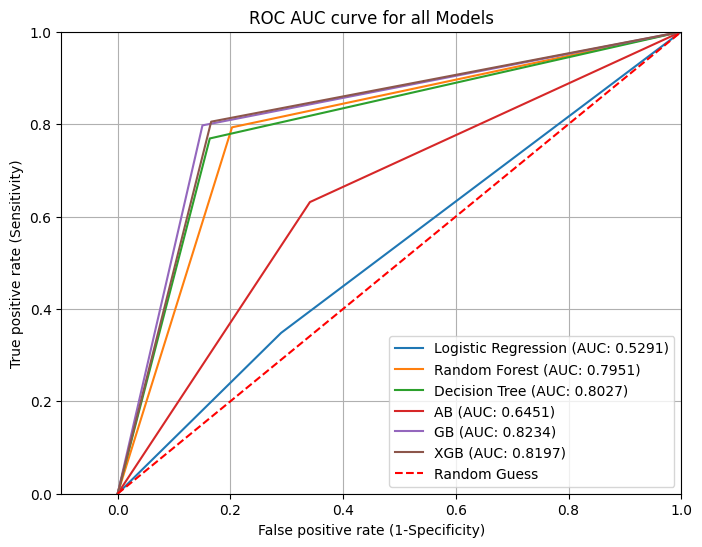

In [77]:
classifiers = [ypred_lg_test, ypred_dt_test, ypred_rf_test, ypred_ada_test, ypred_gb_test, ypred_xgb_test]
labels = names

plt.figure(figsize=(8, 6))
for i, y_p_test in enumerate(classifiers):
    fpr, tpr, _ = roc_curve(y_test, y_p_test)
    auc_score = roc_auc_score(y_test, y_p_test)
#   plt.plot(fpr, tpr, label=labels[i])
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC: {auc_score:.4f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC AUC curve for all Models')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)


plt.legend()
plt.show()

<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Ensemble Model</p>

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Hyperparameter Tunning for Gradient Boosting, XG Boosting, Random Forest<p>

In [78]:
# Hyperparameter grid for Gradient Boosting
param_dist_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Hyperparameter grid for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1]
}

# Hyperparameter grid for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Initializing Models<p>

In [79]:
model_gb = GradientBoostingClassifier()
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_rf = RandomForestClassifier()

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Setting Up Randomized SearchCV<p>

In [80]:
random_search_gb = RandomizedSearchCV(estimator=model_gb, param_distributions=param_dist_gb, n_iter=100, cv=5, scoring='recall', verbose=1, n_jobs=-1, random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_dist_xgb, n_iter=100, cv=5, scoring='recall', verbose=1, n_jobs=-1, random_state=42)
random_search_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist_rf, n_iter=100, cv=5, scoring='recall', verbose=1, n_jobs=-1, random_state=42)


<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Splitting the Data into Train and Test<p>

In [81]:
#X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_split = X_train
X_val_split = X_test
y_train_split = y_train
y_val_split = y_test

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Fitting the Models<p>

In [82]:
random_search_gb.fit(X_train_split, y_train_split)
random_search_xgb.fit(X_train_split, y_train_split)
random_search_rf.fit(X_train_split, y_train_split)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='recall', verbose=1)

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Creating Ensemble Model<p>

In [83]:
# Best parameters and scores for each model
best_params_gb = random_search_gb.best_params_
best_score_gb = random_search_gb.best_score_
best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print("Best Parameters (GB):", best_params_gb)
print("Best Cross-Validation recall (GB):", best_score_gb)
print("Best Parameters (XGB):", best_params_xgb)
print("Best Cross-Validation recall (XGB):", best_score_xgb)
print("Best Parameters (RF):", best_params_rf)
print("Best Cross-Validation recall (RF):", best_score_rf)

Best Parameters (GB): {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 4, 'learning_rate': 0.2}
Best Cross-Validation recall (GB): 0.8164150018240692
Best Parameters (XGB): {'subsample': 0.8, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1}
Best Cross-Validation recall (XGB): 0.8172245564637436
Best Parameters (RF): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}
Best Cross-Validation recall (RF): 0.7536892960551116


In [84]:
ensemble = VotingClassifier(estimators=[
    ('gb', random_search_gb.best_estimator_),
    ('xgb', random_search_xgb.best_estimator_),
    ('rf', random_search_rf.best_estimator_)
], voting='soft')

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Fitting the Ensemble Model<p>

In [85]:
ensemble.fit(X_train_split, y_train_split)

VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(learning_rate=0.2,
                                                         max_depth=4,
                                                         max_features='auto',
                                                         n_estimators=300)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',...
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('rf',
                              RandomForestClassifier(max_depth=30,
                                                     max_features='auto',
                                                     min_samples_split=5))],
                 voting='soft')

<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Predicting and Evaluating the Ensemble Model<p>

[0.11375802 0.91148883 0.89608092 ... 0.48816834 0.26476097 0.53911282]
Optimal Threshold: 0.55
Maximum Youden's Index: 0.6538427664990283
[0 1 1 ... 0 0 0]
Test recall score 0.8081090527787487
ROC-AUC score 0.8255492127109376

-------------------------- CLASSIFICATION REPORT --------------------------------------

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      2917
         1.0       0.83      0.81      0.82      2861

    accuracy                           0.83      5778
   macro avg       0.83      0.83      0.83      5778
weighted avg       0.83      0.83      0.83      5778

-------------------------- CONFUSION MATRIX ---------------------------------------------



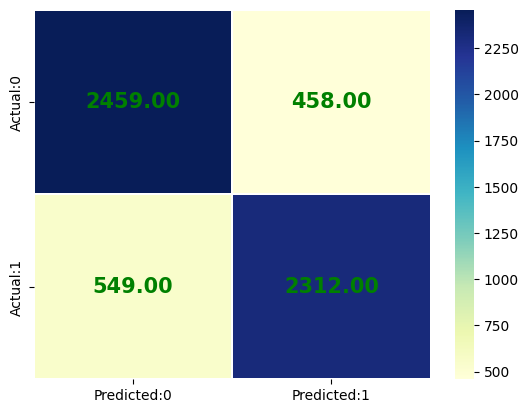

In [86]:

y_prob = ensemble.predict_proba(X_val_split)[:,1]
print(y_prob)

def youdens_index(y_true, y_prob, thresholds):
    max_index = -1
    optimal_threshold = 0
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        index = sensitivity + specificity - 1
        if index > max_index:
            max_index = index
            optimal_threshold = threshold
    return optimal_threshold, max_index

# Evaluate at multiple thresholds
thresholds = np.arange(0.0, 1.01, 0.01)
optimal_threshold, max_index = youdens_index(y_val_split, y_prob, thresholds)

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Maximum Youden's Index: {max_index}")

# Make final predictions using the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
print(y_pred_optimal)

y_test_pred=y_pred_optimal
y_pred_optimal = ensemble.predict(X_test)

print("Test recall score",recall_score(y_test,y_pred_optimal))

print("ROC-AUC score",roc_auc_score(y_test,y_pred_optimal))

print()

print("-------------------------- CLASSIFICATION REPORT --------------------------------------")
print()

print(classification_report(y_test,y_pred_optimal))

print("-------------------------- CONFUSION MATRIX ---------------------------------------------")
print()

con_mat=confusion_matrix(y_test,y_pred_optimal)
con_mat

sns.heatmap(con_mat, annot = False, fmt = 'd', cmap = "YlGnBu", cbar = True,
            linewidths = 0.1, annot_kws = {'size':25},xticklabels=['Predicted:0','Predicted:1'],yticklabels= ['Actual:0','Actual:1'])
# Manually annotate all cells

for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        plt.text(j+0.5, i+0.5, format(con_mat[i,j], ".2f"), ha="center", va="center", color="green",fontweight='bold',fontsize=15)

**INFERENCE:**
- We applied Voting classifier to ensemble models - Random Forest, Gradient Boost & XG Boost to enhance the overall model performance
- Model has shown improved recall score of 81.26% with FN count of 549

Validation Set:
TP: 2312, FP: 458, TN: 2459, FN: 549
Test Set:
TP: 2159, FP: 294, TN: 2623, FN: 702


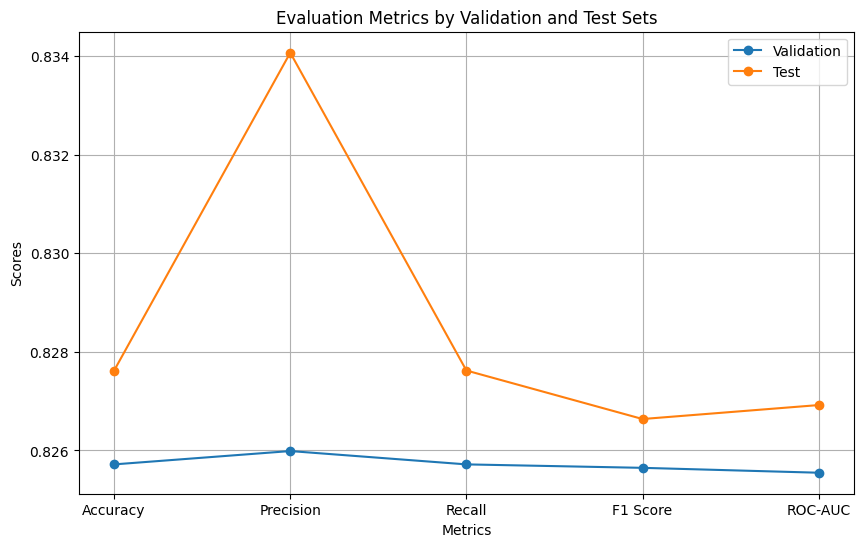

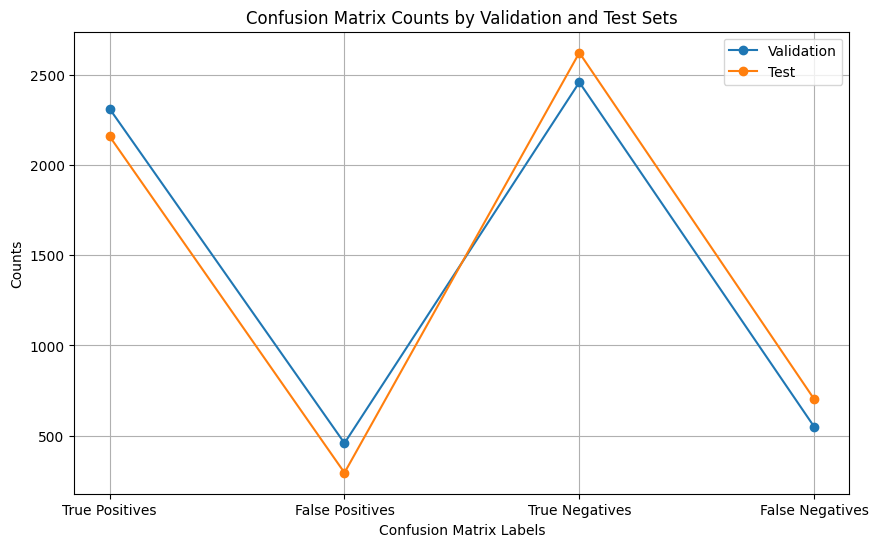

In [87]:

# Predict on validation and test sets
y_val_pred = ensemble.predict(X_val_split)
#y_test_pred = ensemble.predict(X_test)

# Calculate metrics for validation set
val_accuracy = accuracy_score(y_val_split, y_val_pred)
val_precision = precision_score(y_val_split, y_val_pred, average='weighted')
val_recall = recall_score(y_val_split, y_val_pred, average='weighted')
val_f1 = f1_score(y_val_split, y_val_pred, average='weighted')
val_roc_auc = roc_auc_score(y_val_split, y_val_pred, average='weighted')

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_roc_auc = roc_auc_score(y_test, y_test_pred, average='weighted')

# Calculate confusion matrix for validation and test sets
val_cm = confusion_matrix(y_val_split, y_val_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, FP, TN, FN for validation set
val_tp = val_cm[1, 1]
val_fp = val_cm[0, 1]
val_tn = val_cm[0, 0]
val_fn = val_cm[1, 0]

# Extract TP, FP, TN, FN for test set
test_tp = test_cm[1, 1]
test_fp = test_cm[0, 1]
test_tn = test_cm[0, 0]
test_fn = test_cm[1, 0]

# Print the values
print(f"Validation Set:\nTP: {val_tp}, FP: {val_fp}, TN: {val_tn}, FN: {val_fn}")
print(f"Test Set:\nTP: {test_tp}, FP: {test_fp}, TN: {test_tn}, FN: {test_fn}")

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
val_scores = [val_accuracy, val_precision, val_recall, val_f1, val_roc_auc]
test_scores = [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]

# Plot evaluation metrics as line graphs
plt.figure(figsize=(10, 6))
plt.plot(metrics, val_scores, marker='o', label='Validation')
plt.plot(metrics, test_scores, marker='o', label='Test')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metrics by Validation and Test Sets')
plt.legend()
plt.grid(True)
plt.show()

# Prepare data for confusion matrix counts
confusion_labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
val_counts = [val_tp, val_fp, val_tn, val_fn]
test_counts = [test_tp, test_fp, test_tn, test_fn]

# Plot confusion matrix counts as line graphs
plt.figure(figsize=(10, 6))
plt.plot(confusion_labels, val_counts, marker='o', label='Validation')
plt.plot(confusion_labels, test_counts, marker='o', label='Test')
plt.xlabel('Confusion Matrix Labels')
plt.ylabel('Counts')
plt.title('Confusion Matrix Counts by Validation and Test Sets')
plt.legend()
plt.grid(True)
plt.show()

In [88]:

y_val_pred = ensemble.predict(X_val_split)
#y_test_pred = ensemble.predict(X_test)

# Calculate confusion matrix for validation and test sets
val_cm = confusion_matrix(y_val_split, y_val_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, FP, TN, FN for validation set
val_tp = val_cm[1, 1]
val_fp = val_cm[0, 1]
val_tn = val_cm[0, 0]
val_fn = val_cm[1, 0]

# Extract TP, FP, TN, FN for test set
test_tp = test_cm[1, 1]
test_fp = test_cm[0, 1]
test_tn = test_cm[0, 0]
test_fn = test_cm[1, 0]

# Calculate Sensitivity and Specificity
val_sensitivity = val_tp / (val_tp + val_fn)
val_specificity = val_tn / (val_tn + val_fp)

test_sensitivity = test_tp / (test_tp + test_fn)
test_specificity = test_tn / (test_tn + test_fp)


<a id="4.1"></a>
<p style="background-color:#FF7F7F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Youden's Index<p>

In [89]:
# Calculate Youden's Index
val_youden_index = val_sensitivity + val_specificity - 1
test_youden_index = test_sensitivity + test_specificity - 1

# Print Youden's Index
print(f"Validation Set Youden's Index: {val_youden_index}")
print(f"Test Set Youden's Index: {test_youden_index}")

Validation Set Youden's Index: 0.6510984254218752
Test Set Youden's Index: 0.6538427664990283


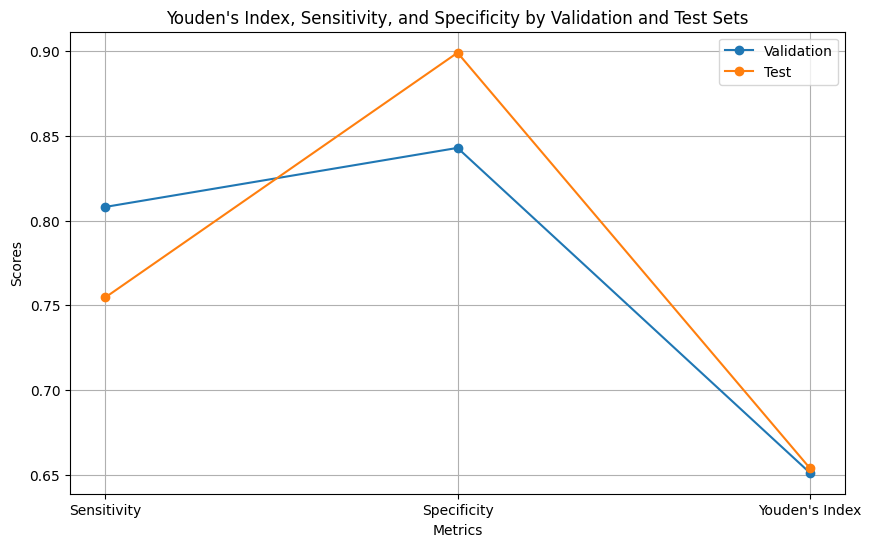

In [90]:
# Visualization
metrics = ['Sensitivity', 'Specificity', "Youden's Index"]
val_scores = [val_sensitivity, val_specificity, val_youden_index]
test_scores = [test_sensitivity, test_specificity, test_youden_index]

plt.figure(figsize=(10, 6))
plt.plot(metrics, val_scores, marker='o', label='Validation')
plt.plot(metrics, test_scores, marker='o', label='Test')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Youden\'s Index, Sensitivity, and Specificity by Validation and Test Sets')
plt.legend()
plt.grid(True)
plt.show()

In [91]:
predicted = ensemble.predict(X_train_split)
# Create a confusion matrix
cm = confusion_matrix(y_train_split, predicted)
# Plot the confusion matrix
cm

array([[11322,   677],
       [  763, 10349]])

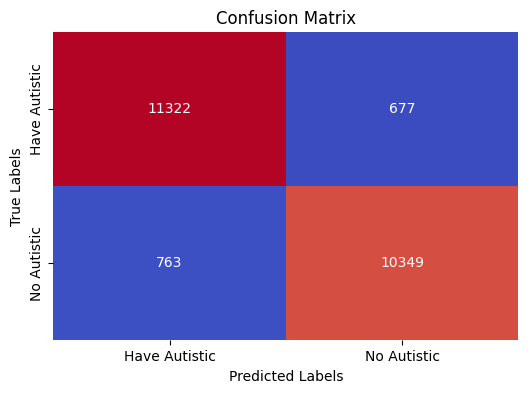

In [92]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(ticks=[0.5, 1.5], labels=['Have Autistic' , 'No Autistic'])
plt.yticks(ticks=[0.5, 1.5], labels=['Have Autistic','No Autistic'])
plt.title("Confusion Matrix")
plt.show()

In [93]:
x_predicted = ensemble.predict(X_val_split)
# Create a confusion matrix
cm = confusion_matrix(y_val_split, x_predicted)
# Plot the confusion matrix
cm

array([[2459,  458],
       [ 549, 2312]])

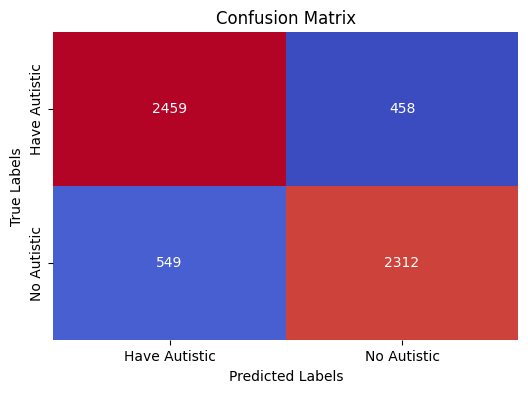

In [94]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(ticks=[0.5, 1.5], labels=['Have Autistic' , 'No Autistic'])
plt.yticks(ticks=[0.5, 1.5], labels=['Have Autistic','No Autistic'])
plt.title("Confusion Matrix")
plt.show()

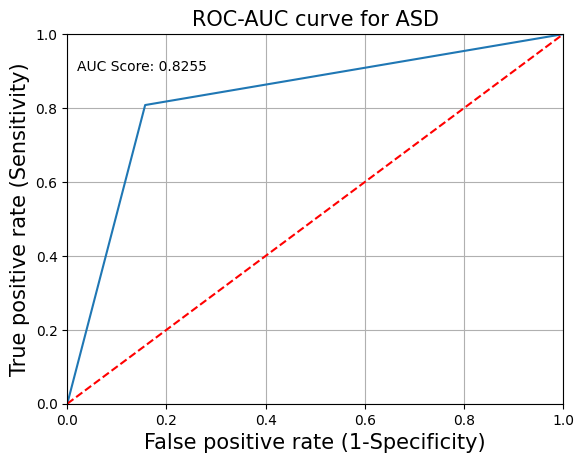

In [95]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
fpr, tpr, thresholds = roc_curve(y_val_split, x_predicted)
auc_score = roc_auc_score(y_val_split, x_predicted)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
plt.title('ROC-AUC curve for ASD', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
plt.text(x = 0.02, y = 0.9, s=f'AUC Score: {auc_score:.4f}')
plt.grid(True)

In [96]:
name_parameters = []
value_parameters = []

accuracy = round(accuracy_score(y_val_split, x_predicted),4)
precision = round(precision_score(y_val_split, x_predicted),4)
recall = round(recall_score(y_val_split, x_predicted),4)
roc_auc = round(roc_auc_score(y_val_split, x_predicted),4)



value_parameters.append(accuracy)
name_parameters.append('Accuracy')
value_parameters.append(precision)
name_parameters.append('Precision')
value_parameters.append(recall)
name_parameters.append('Recall')
value_parameters.append(roc_auc)
name_parameters.append('ROC AUC')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

Accuracy: 0.8257
Precision: 0.8347
Recall: 0.8081
ROC AUC: 0.8255


In [97]:
def bar_plots_test(x, y):
    plt.figure(figsize=(15, 4))
    plt.bar(x, y, color='skyblue')
    plt.xlabel('Models')
    plt.ylabel('Values')
    plt.title(f'Different parameters of the model')
    plt.ylim(0.40, 0.90)
    ylim_range = 0.90 - 0.5
    text_height = ylim_range / 10
    for i, value in enumerate(y):
        plt.text(i, value + text_height, str(value), ha='center')
    plt.show()

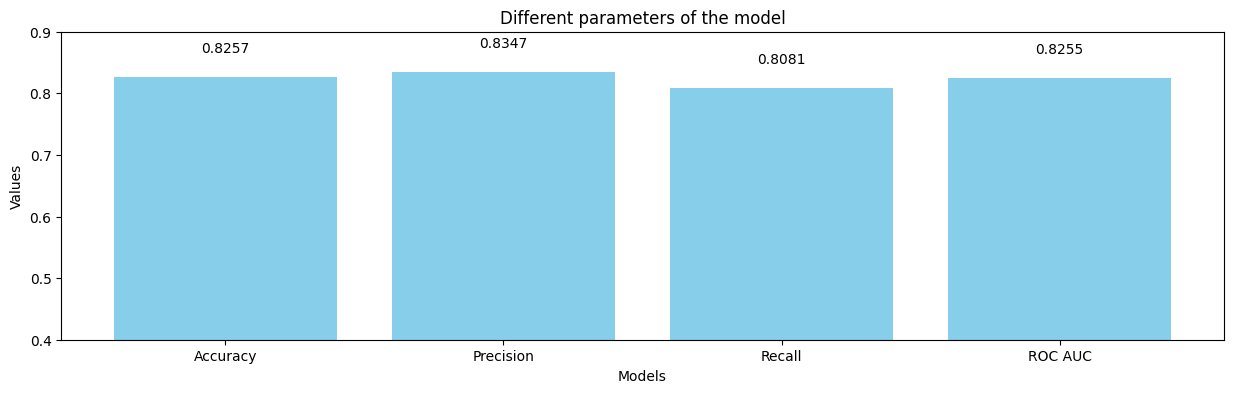

In [98]:
bar_plots_test(name_parameters, value_parameters)

<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Important features impacting on target variable - Class_ASD</p>

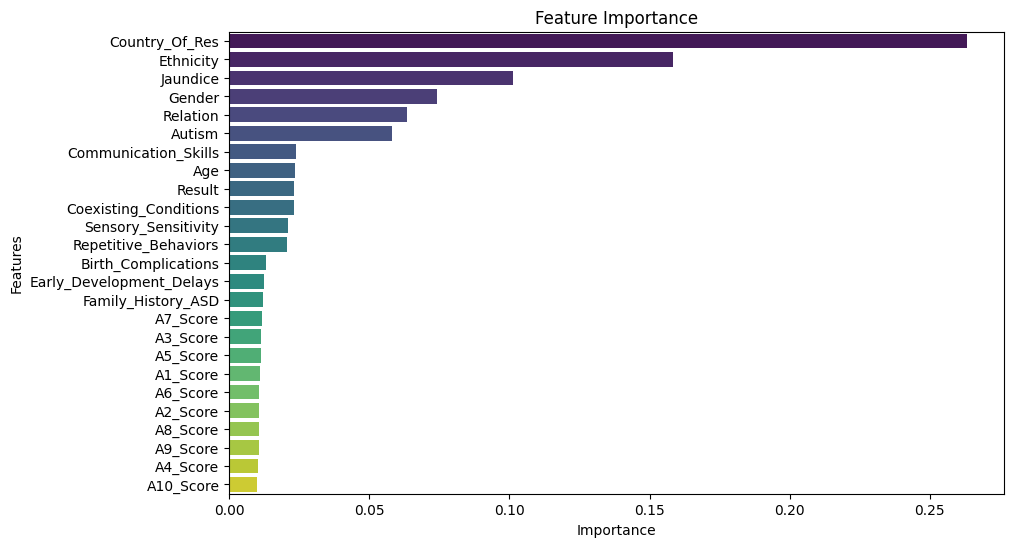

                    Features  Importance
4             Country_Of_Res    0.263377
1                  Ethnicity    0.158409
2                   Jaundice    0.101316
0                     Gender    0.074053
5                   Relation    0.063331
3                     Autism    0.058272
6       Communication_Skills    0.023907
23                       Age    0.023472
24                    Result    0.023153
9      Coexisting_Conditions    0.023033
8        Sensory_Sensitivity    0.021045
7       Repetitive_Behaviors    0.020731
10       Birth_Complications    0.013210
11  Early_Development_Delays    0.012579
12        Family_History_ASD    0.011981
19                  A7_Score    0.011701
15                  A3_Score    0.011349
17                  A5_Score    0.011342
13                  A1_Score    0.011178
18                  A6_Score    0.010632
14                  A2_Score    0.010597
20                  A8_Score    0.010560
21                  A9_Score    0.010524
16              

In [99]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain
X_train_df = pd.DataFrame(X_train, columns=['Gender', 'Ethnicity', 'Jaundice', 'Autism', 'Country_Of_Res',
       'Relation', 'Communication_Skills', 'Repetitive_Behaviors',
       'Sensory_Sensitivity', 'Coexisting_Conditions', 'Birth_Complications',
       'Early_Development_Delays', 'Family_History_ASD', 'A1_Score',
       'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score',
       'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Result'])

# Extract feature importances from models that provide them
feature_importances = []
for name, estimator in ensemble.named_estimators_.items():
    if hasattr(estimator, 'feature_importances_'):
        feature_importances.append(estimator.feature_importances_)

# Aggregate feature importances (e.g., by averaging)
if feature_importances:
    avg_feature_importances = np.mean(feature_importances, axis=0)

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({'Features': X_train_df.columns,
                                          'Importance': avg_feature_importances})

    # Sort the features by importance
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Features', data=feature_importance_df, palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

    # Display the feature importances
    print(feature_importance_df)
else:
    print("None of the base models provide feature importances.")

<p style = "font-size:150%; color:#226666">💡 Inference </p>
   
  - <p style = "color:#226666"> Feature Country_Of_Res has highest impact on Class_ASD.</p>
  - <p style = "color:#226666">Ethnicity ranks second in impacting ASD followed by Jaundice,Gender, Relation,Autism and age. </p>
  - <p style = "color:#226666">Family_History_ASD,Birth Complications A9_Score, A10_score have lesser impact on ASD.</p>

<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Thank You</p>

<a id="6"></a>
# <p style="background-color:#008080;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Team Work by Nikhil, Papri, Rashmi, Sameer, Ayushi, Tsion</p>